분해법을 예측모형으로 사용할 일은 없지만... 모형이 어떤 게 좋은지 비교를 하라 -> MSE를 구해서 비교를 할텐데, 어떤 데이터는 log, 어떤 데이터는 exp를 써서 비교를 할텐데 이를 꼭 오리지널 데이터로 변환한 뒤에 비교를 해야 한다.

불규칙 성분 분석에서는 잔차 평균이 0인지, 이분산성이 있는지를 확인하는 게 제일 중요하다.

1차 자기상관도 확인해볼 수 있으나, 아직은 뭔갈 해줄 수 없기 때문에 큰 문제는 없다. 좋진 않다.

# 분해법

## Moving Average

### A. 단순이동평균 / 중심이동평균

In [1]:
############## package
library(forecast) #ma
library(TTR) #sma
library(lmtest) #dwtest

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [5]:
options(repr.plot.width = 15, repr.plot.height = 8)
setwd("~/TS2024/data/Time Series Data/")

In [6]:
z = scan("mindex.txt")
mindex = ts(z, start = c(1986, 1), frequency = 12)

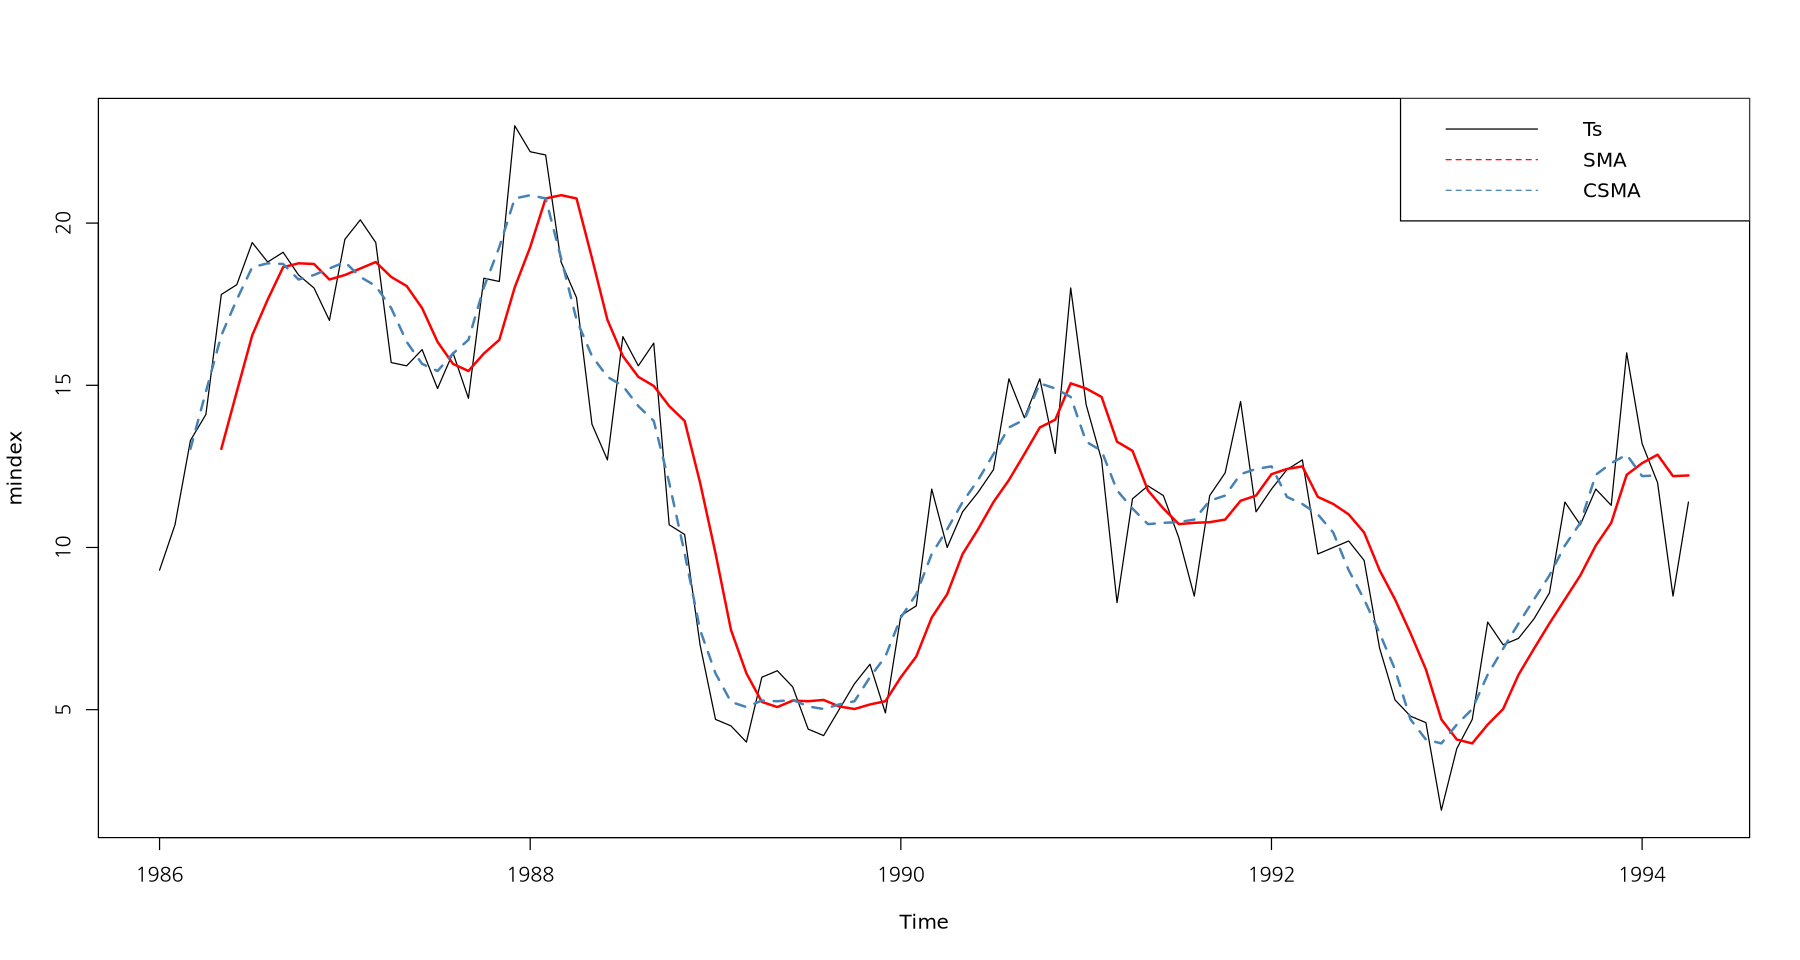

In [15]:
plot.ts(mindex)
lines(SMA(mindex, n = 5), col = 'red', lwd = 2)
lines(ma(mindex, order = 5, centre = TRUE), col = 'steelblue', lty = 2, lwd = 2) ## 중심이동평균
legend('topright', legend = c("Ts", 'SMA', 'CSMA'), lty = c(1, 2, 2), col = c("black", "red", "steelblue"))

In [16]:
SMA(mindex, n = 5)
ma(mindex, order = 5, centre = T)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1986,NA,NA,NA,NA,13.04,14.80,16.54,17.64,18.64,18.76,18.74,18.26
1987,18.40,18.60,18.80,18.34,18.06,17.38,16.34,15.66,15.44,15.98,16.40,18.02
1988,19.26,20.76,20.86,20.76,18.92,17.02,15.90,15.26,14.98,14.36,13.90,12.00
1989,9.82,7.46,6.12,5.24,5.08,5.28,5.26,5.30,5.10,5.02,5.16,5.26
1990,6.00,6.64,7.84,8.56,9.80,10.56,11.40,12.08,12.88,13.70,13.94,15.06
1991,14.90,14.64,13.26,12.98,11.76,11.20,10.72,10.76,10.78,10.86,11.44,11.60
1992,12.26,12.42,12.50,11.56,11.34,11.02,10.46,9.30,8.40,7.36,6.24,4.70
1993,4.08,3.96,4.54,5.02,6.08,6.88,7.66,8.40,9.14,10.06,10.76,12.24
1994,12.60,12.86,12.20,12.22,,,,,,,,


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1986,NA,NA,13.04,14.80,16.54,17.64,18.64,18.76,18.74,18.26,18.40,18.60
1987,18.80,18.34,18.06,17.38,16.34,15.66,15.44,15.98,16.40,18.02,19.26,20.76
1988,20.86,20.76,18.92,17.02,15.90,15.26,14.98,14.36,13.90,12.00,9.82,7.46
1989,6.12,5.24,5.08,5.28,5.26,5.30,5.10,5.02,5.16,5.26,6.00,6.64
1990,7.84,8.56,9.80,10.56,11.40,12.08,12.88,13.70,13.94,15.06,14.90,14.64
1991,13.26,12.98,11.76,11.20,10.72,10.76,10.78,10.86,11.44,11.60,12.26,12.42
1992,12.50,11.56,11.34,11.02,10.46,9.30,8.40,7.36,6.24,4.70,4.08,3.96
1993,4.54,5.02,6.08,6.88,7.66,8.40,9.14,10.06,10.76,12.24,12.60,12.86
1994,12.20,12.22,NA,NA,,,,,,,,


> 값은 똑같으나 두 칸이 차이가 나게 됨 ㅇㅇ

### B. 이동평균을 이용한 분해법

In [17]:
z <- scan("food.txt")
t <- 1:length(z)
food <- ts(z, start=c(1981,1), frequency=12)
log_food <- log(food) #이분산성 제거를 위한 로그변환

`-` 추세성분 $\hat T_t$

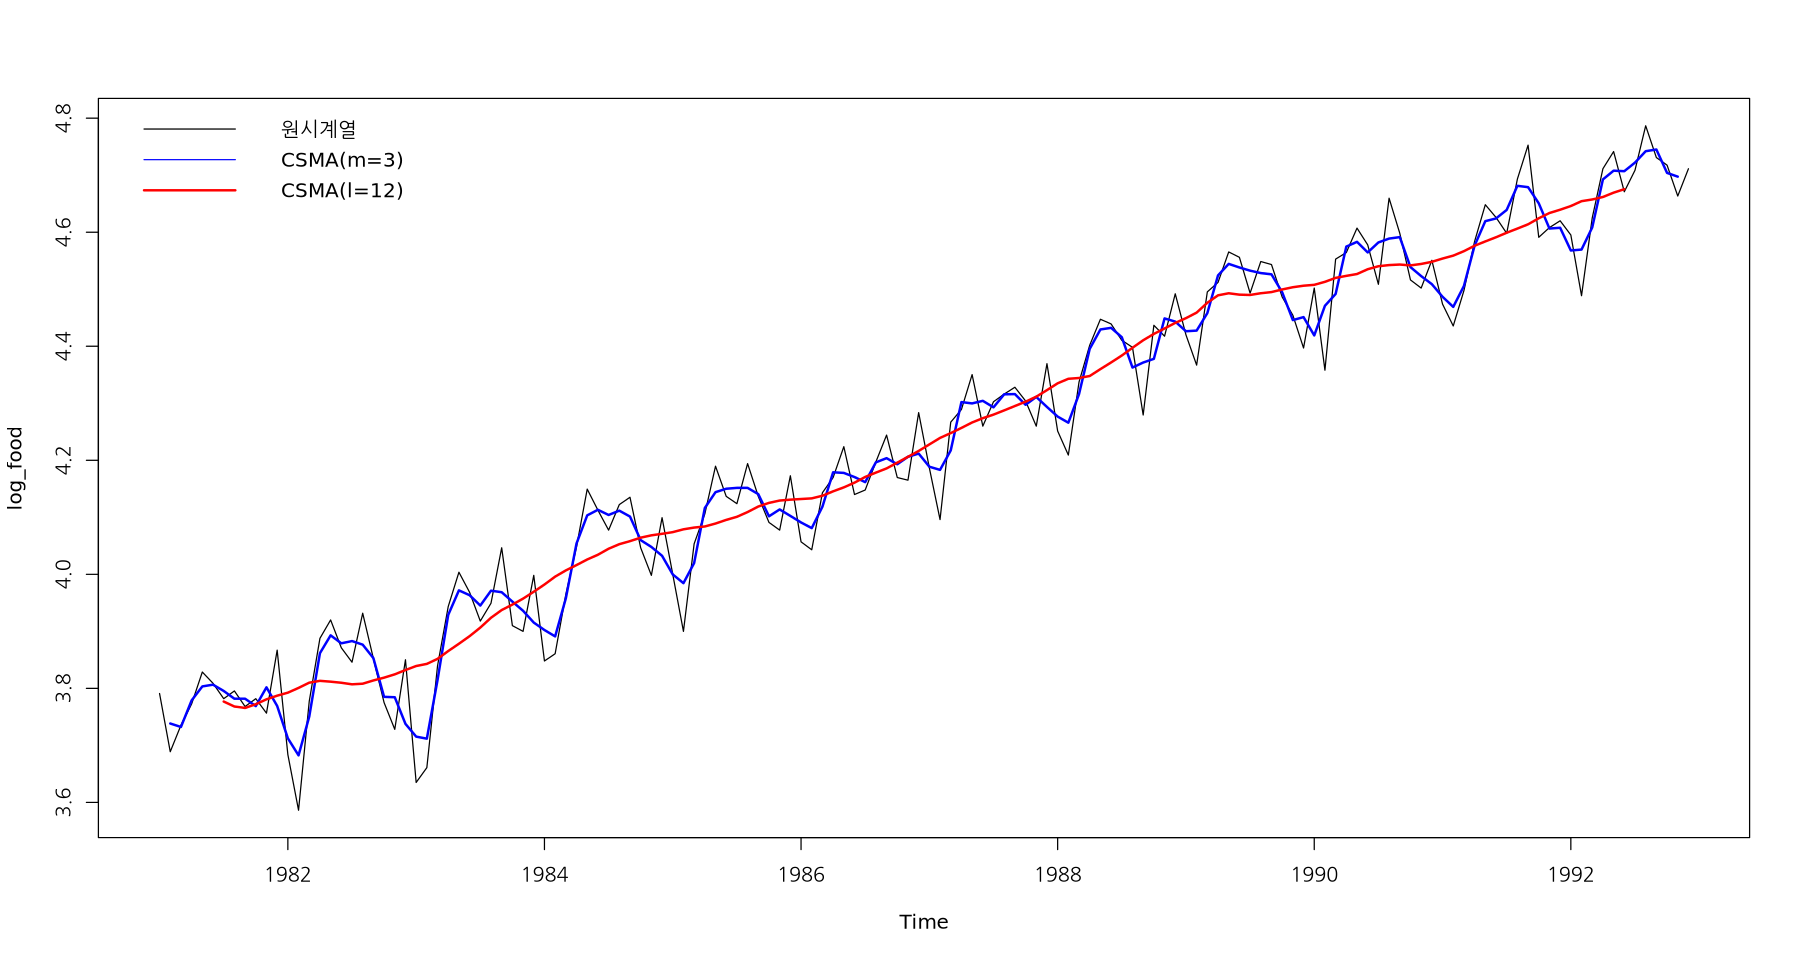

In [24]:
plot.ts(log_food)
lines(ma(log_food,3), col='blue', lwd=2)
lines(ma(log_food,12), col='red', lwd=2) ## 계절 성분 제거 = 추세 성분
legend('topleft', lty=c(1,1,1), col=c('black', 'blue', 'red'),
        lwd=c(1,1,2),
        c('원시계열', "CSMA(m=3)", "CSMA(l=12)"),
        bty='n')

> 숫자가 커질 수록 flat해지지만, 원 계절성분과 주기를 맞춰주면 그 이후부터는 값이 거의 동일하다. : 계절성분만 존재

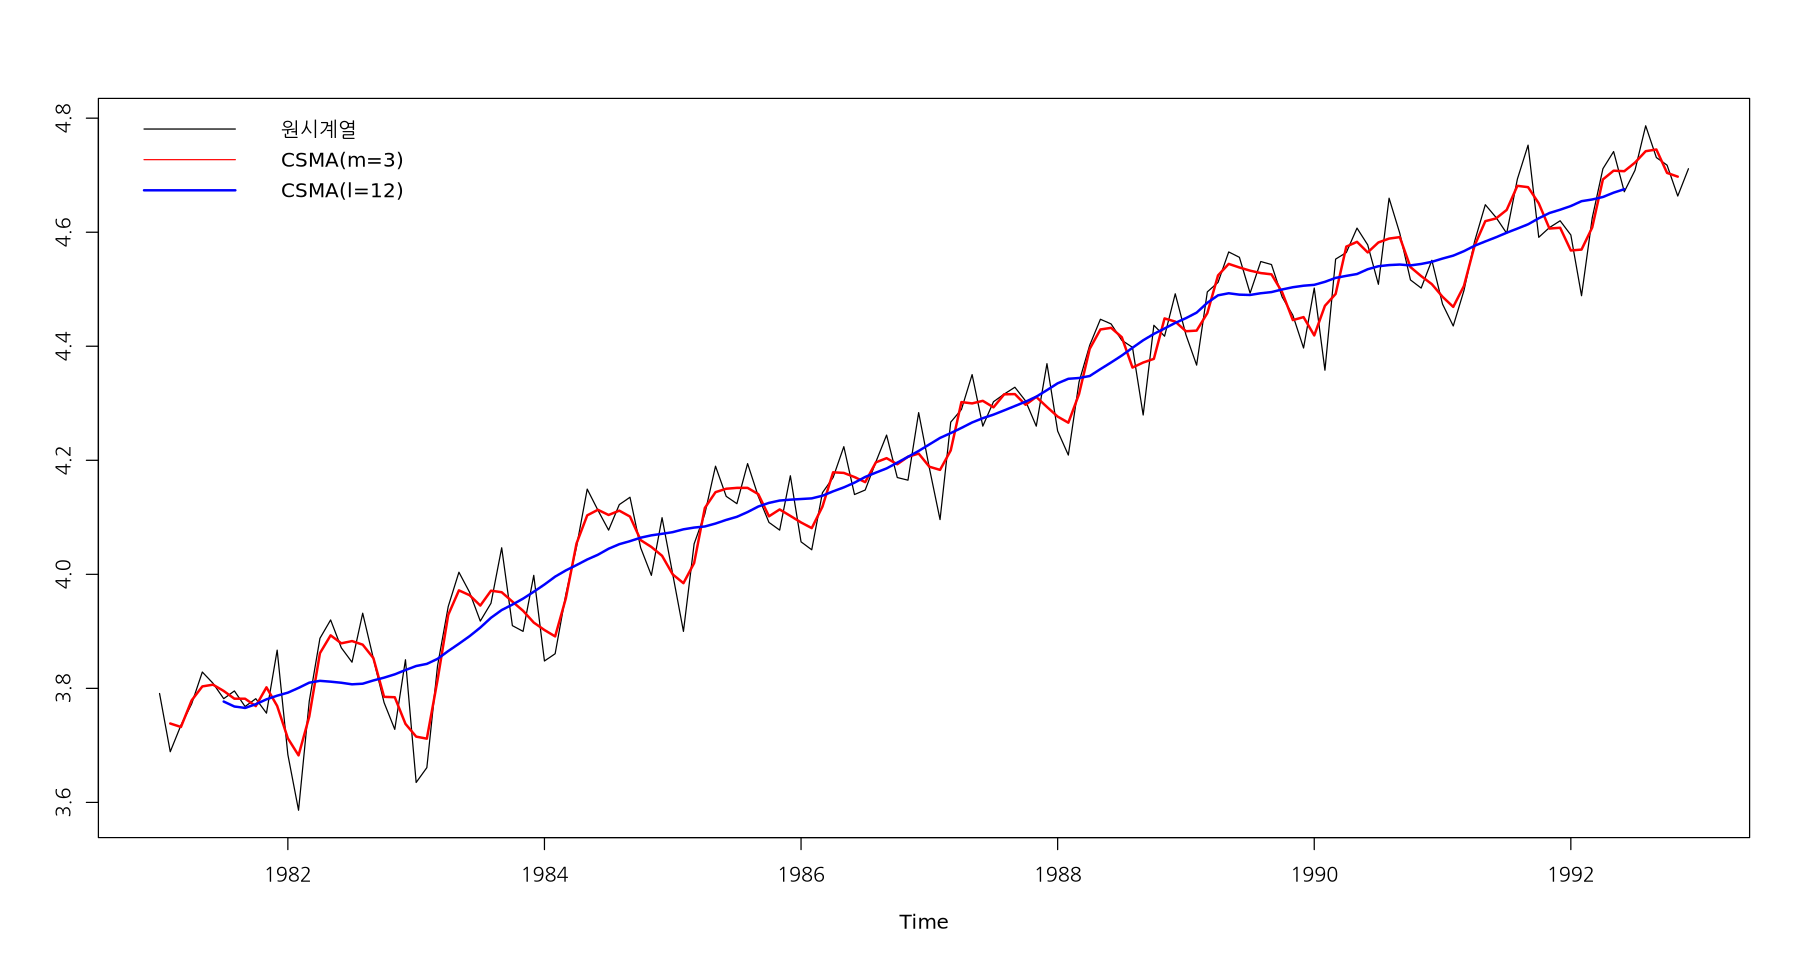

In [26]:
## 한번에 그리는 법
ts.plot(log_food,ma(log_food,3),ma(log_food,12),col=c('black', 'red', 'blue'),lwd = c(1, 2, 2))
legend('topleft', lty=c(1,1,1), col=c('black', 'red', 'blue'),
        lwd=c(1,1,2),
        c('원시계열', "CSMA(m=3)", "CSMA(l=12)"),
        bty='n')

`-` 계절성분 : $Z_t - \hat T_t$(추세가 조정된 시계열에서) 각 계절성분의 평균을 구한 후, 0으로 조정

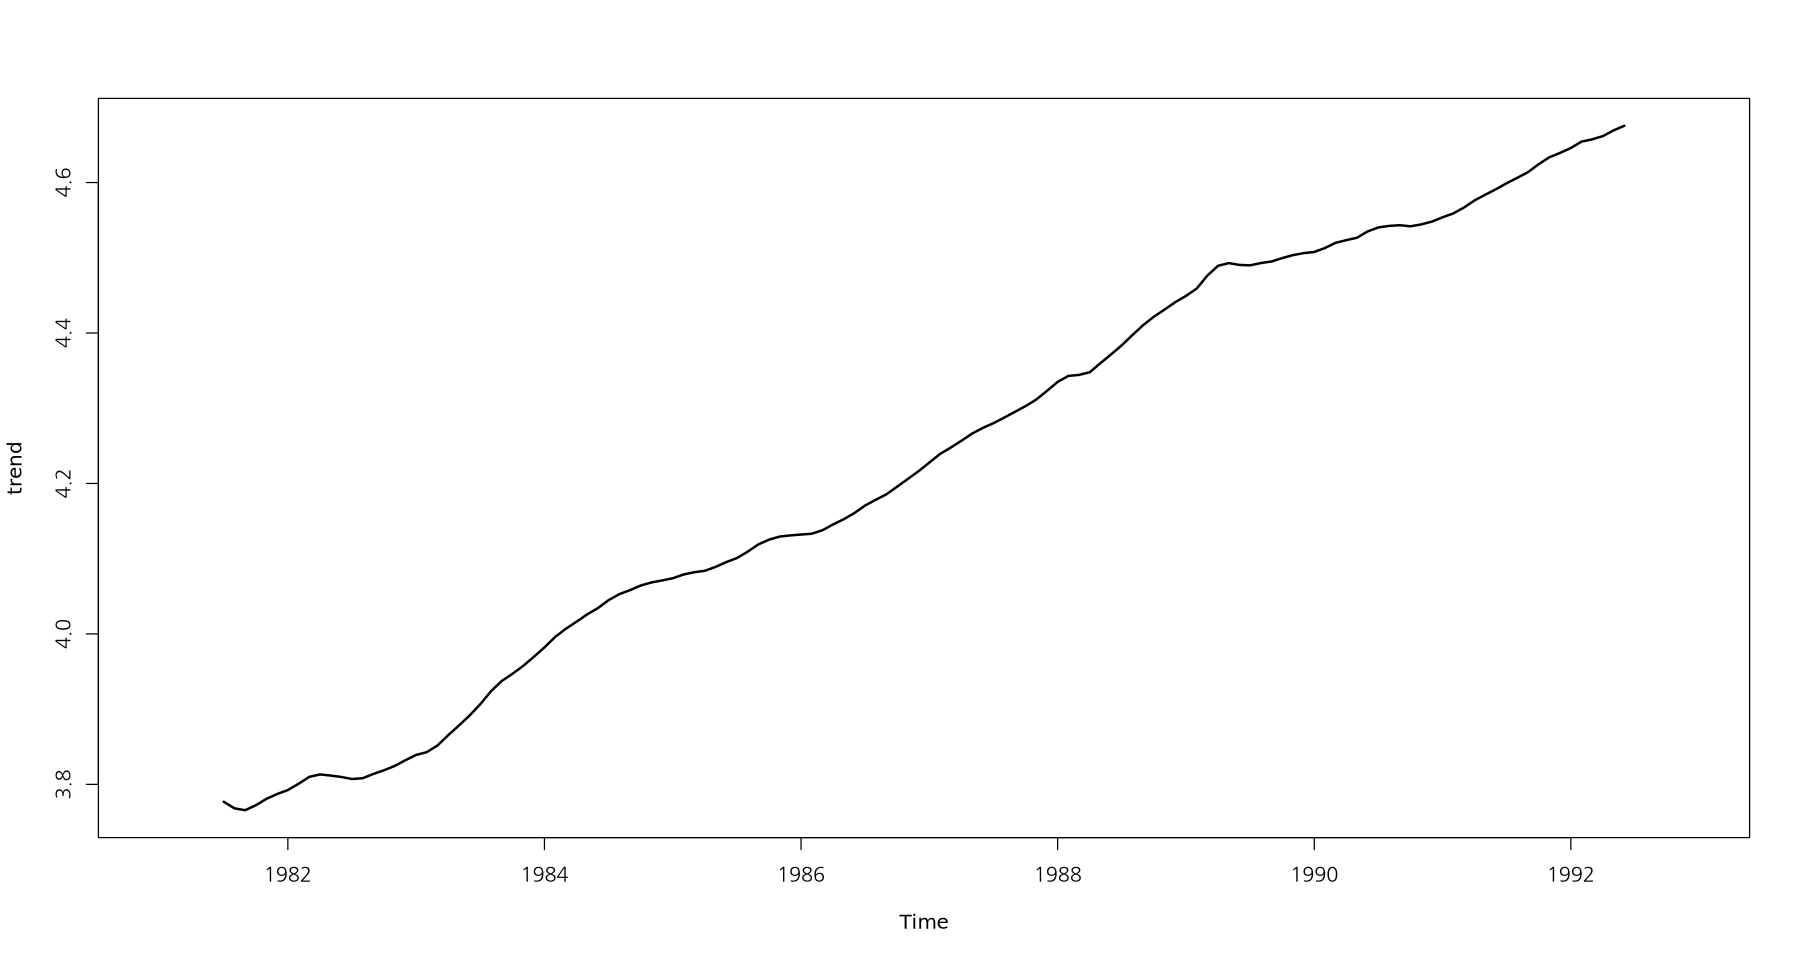

In [27]:
trend = ma(log_food, 12) ## 계절 성분 주기와 동일한 중심이동평균 평활값
plot.ts(trend, lwd=2)

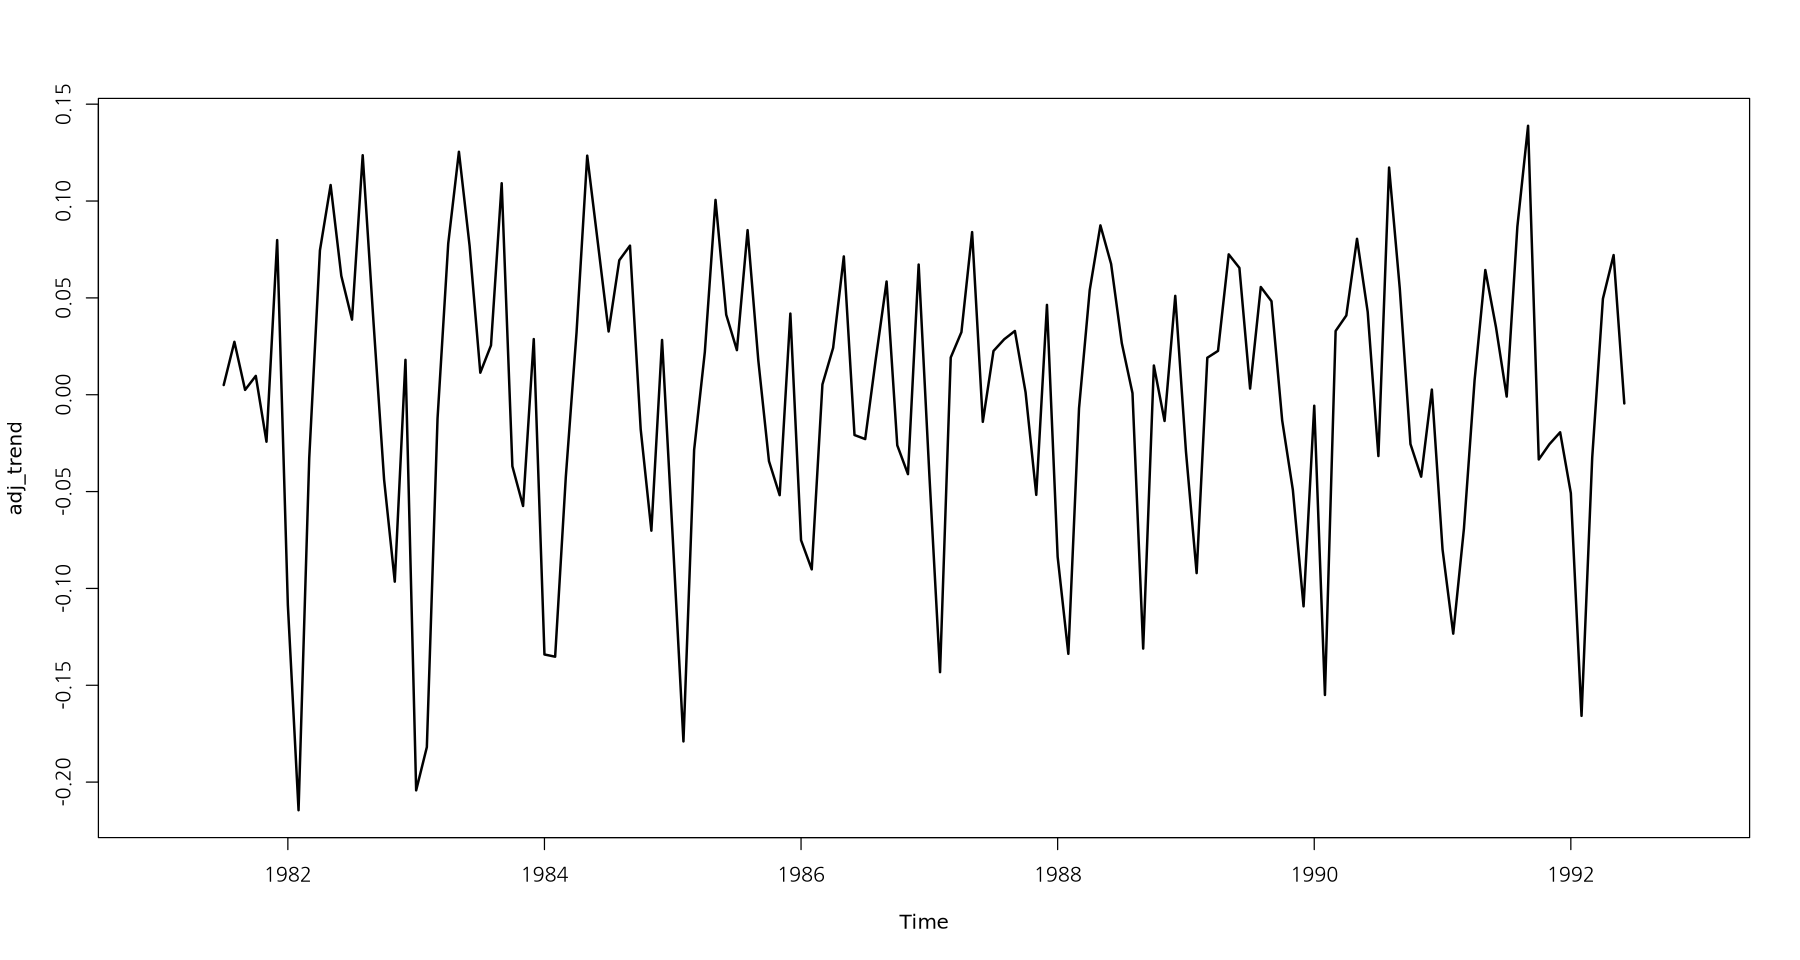

In [28]:
adj_trend <- log_food - trend
plot.ts(adj_trend, lwd=2)

> 해당 값에서 사이클 별 표본 평균으로 계절성분을 나타낼 수 있다.

In [29]:
seasonal <- tapply(adj_trend, cycle(adj_trend), function(y) mean(y,na.rm=T))
seasonal

1           2           3           4           5           6 
-0.08058938 -0.14673108 -0.01343221  0.03980949  0.08999456  0.03899139 
          7           8           9          10          11          12 
 0.00979449  0.05807463  0.04065427 -0.01862471 -0.04758747  0.02139864

In [30]:
summary(lm(adj_trend~0+as.factor(cycle(adj_trend))))


Call:
lm(formula = adj_trend ~ 0 + as.factor(cycle(adj_trend)))

Residuals:
      Min        1Q    Median        3Q       Max 
-0.171707 -0.018376  0.001116  0.023348  0.098197 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
as.factor(cycle(adj_trend))1  -0.080589   0.011748  -6.860 3.22e-10 ***
as.factor(cycle(adj_trend))2  -0.146731   0.011748 -12.489  < 2e-16 ***
as.factor(cycle(adj_trend))3  -0.013432   0.011748  -1.143 0.255181    
as.factor(cycle(adj_trend))4   0.039809   0.011748   3.388 0.000951 ***
as.factor(cycle(adj_trend))5   0.089995   0.011748   7.660 5.28e-12 ***
as.factor(cycle(adj_trend))6   0.038991   0.011748   3.319 0.001197 ** 
as.factor(cycle(adj_trend))7   0.009794   0.011748   0.834 0.406115    
as.factor(cycle(adj_trend))8   0.058075   0.011748   4.943 2.52e-06 ***
as.factor(cycle(adj_trend))9   0.040654   0.011748   3.460 0.000748 ***
as.factor(cycle(adj_trend))10 -0.018625   0.011748  -1.585 0.115531    
as.factor(cycl

`-` 계절성분 평균값 수정

In [31]:
mean(seasonal)

[1] -0.0006872817

In [32]:
seasonal = seasonal - mean(seasonal)
seasonal

1           2           3           4           5           6 
-0.07990209 -0.14604380 -0.01274493  0.04049678  0.09068184  0.03967867 
          7           8           9          10          11          12 
 0.01048177  0.05876191  0.04134155 -0.01793742 -0.04690019  0.02208592

In [34]:
St = rep(seasonal, 12)

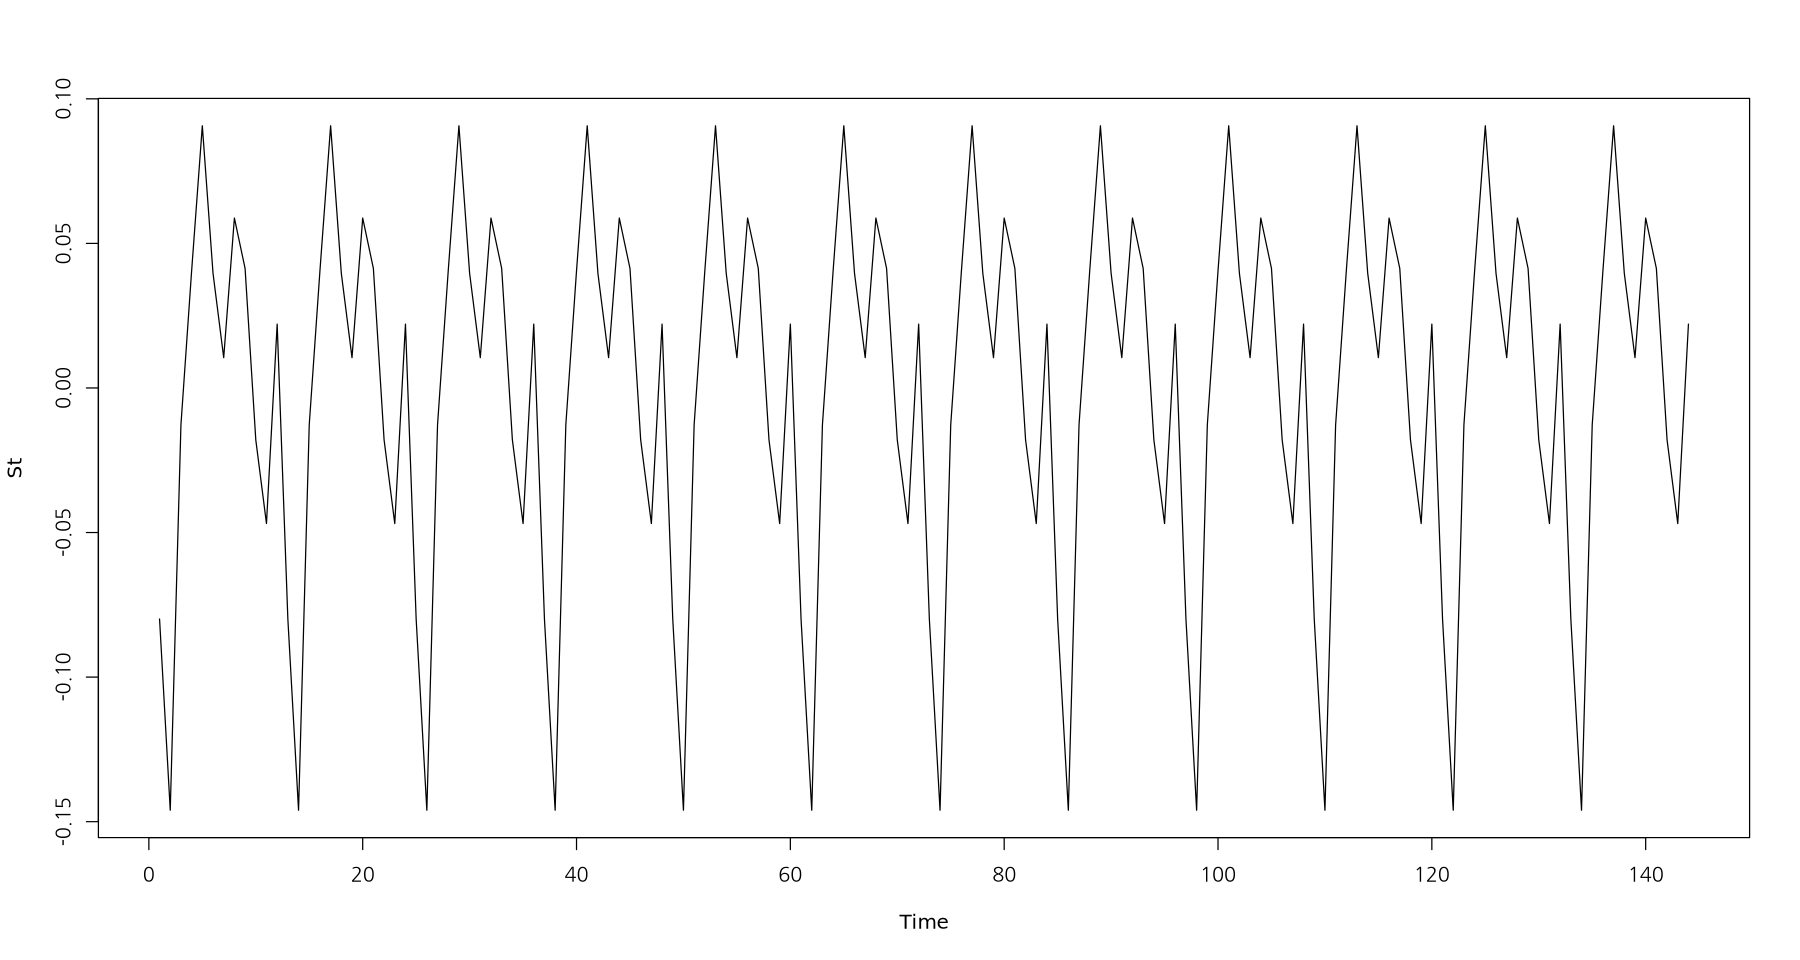

In [35]:
plot.ts(St)

`-` 불규칙 성분 $\hat I_t = Z_t - \hat T_t - \hat S_t$

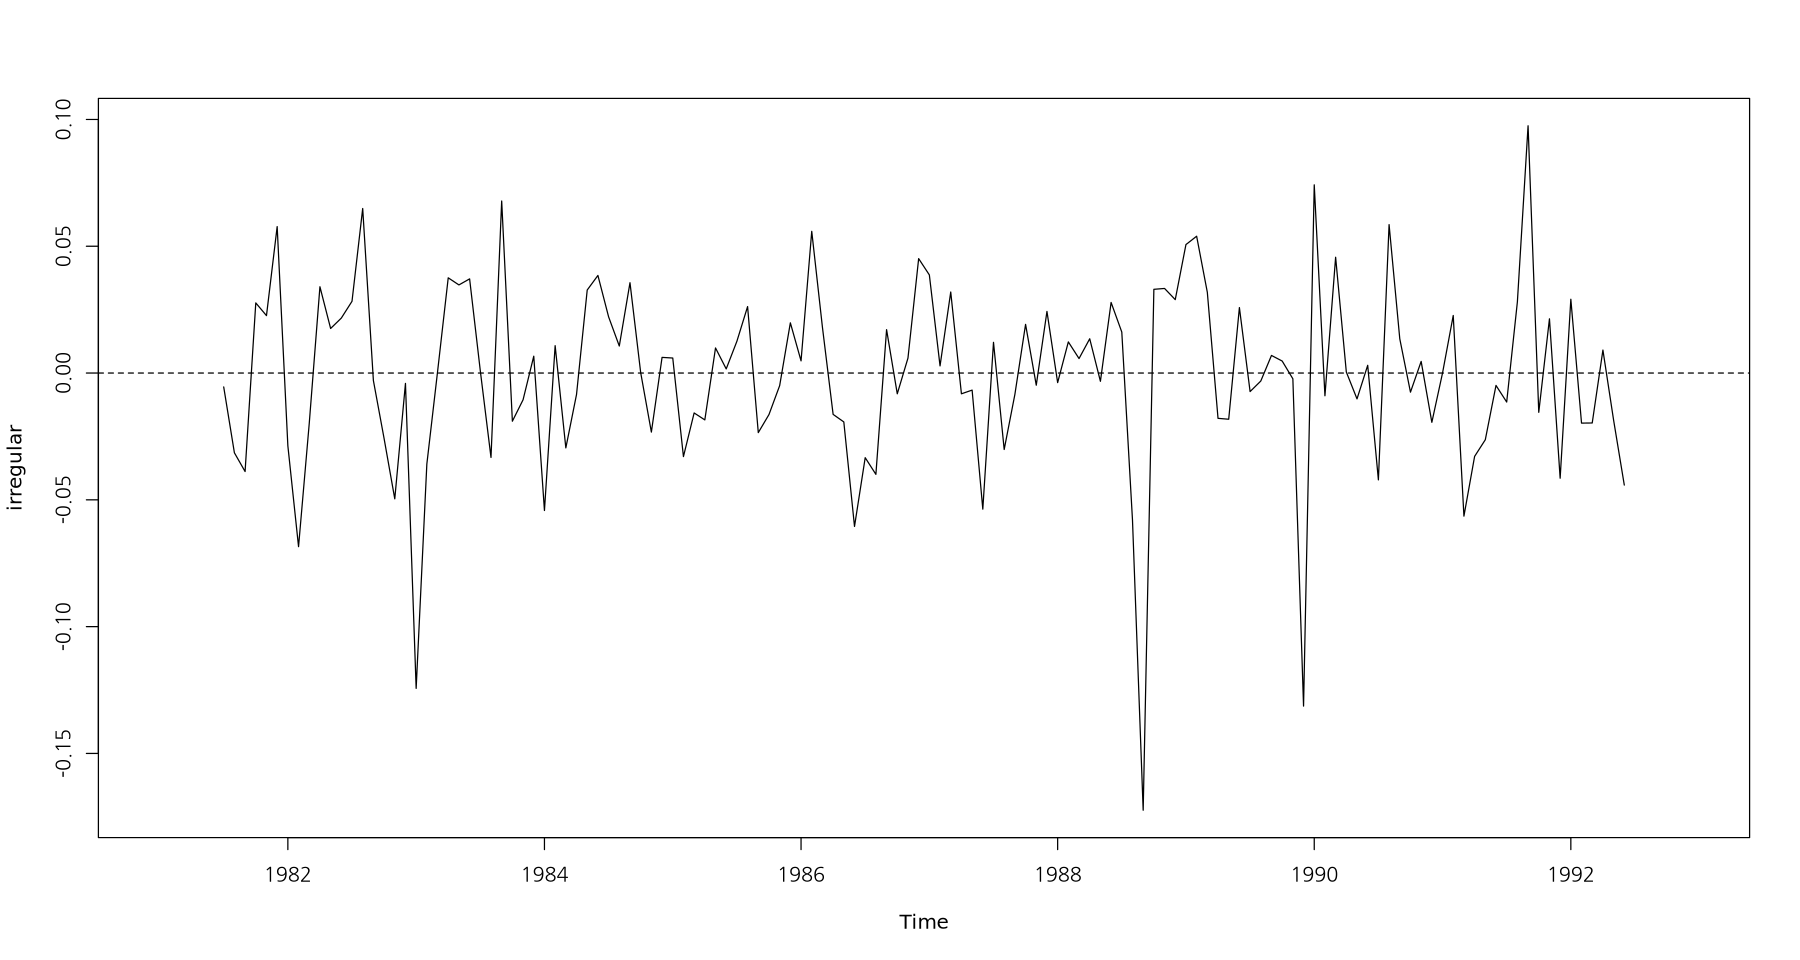

In [36]:
irregular <- log_food - trend - St
plot.ts(irregular)
abline(h=0, lty=2)

`-` 잔차 검정

In [37]:
t.test(irregular)


	One Sample t-test

data:  irregular
t = -0.21173, df = 131, p-value = 0.8326
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.007108577  0.005734014
sample estimates:
    mean of x 
-0.0006872817 


In [38]:
dwtest(lm(irregular~1))


	Durbin-Watson test

data:  lm(irregular ~ 1)
DW = 1.7816, p-value = 0.1031
alternative hypothesis: true autocorrelation is greater than 0


> p-value가 낮긴 하지만 용납할 수 있음

`-` 추정 $\hat Z_t = \hat T_t + \hat S_t$

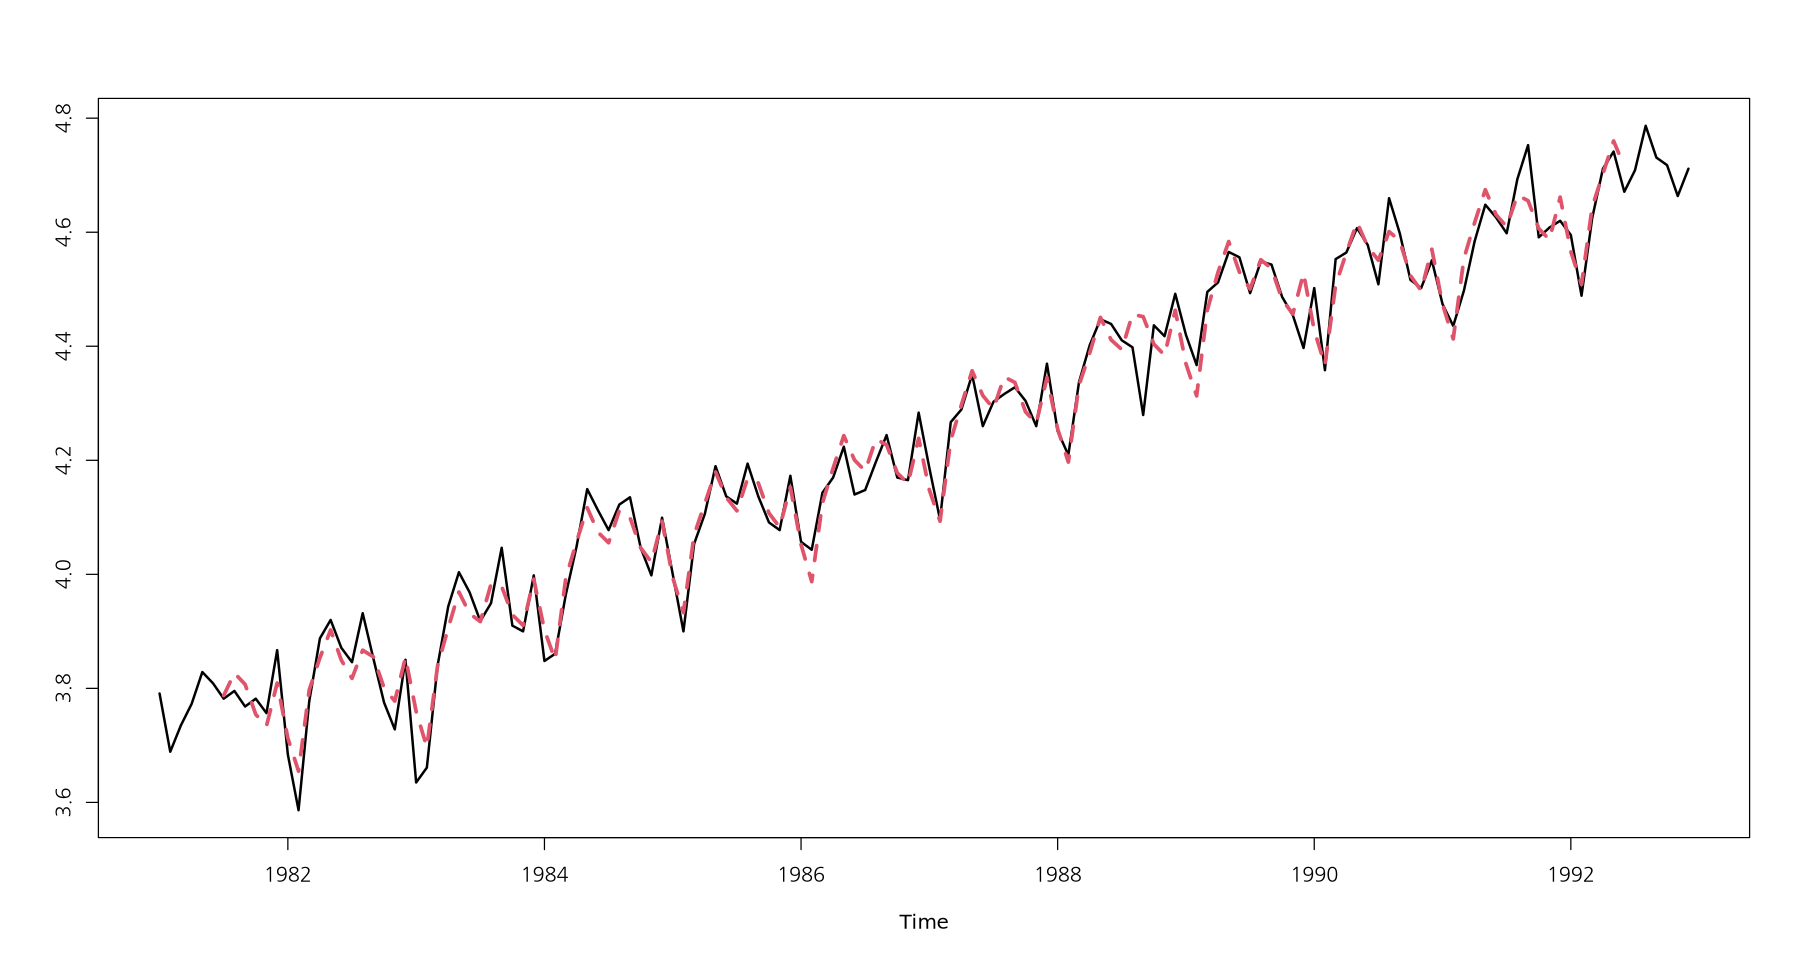

In [39]:
fit_ <- trend + St
ts.plot(log_food, fit_, lty=1:2, col=1:2, lwd=2:3)

### C. `decompose` 함수를 이용한 분해법

위에서 설명한 평활법을 이용한 분해와 동일

In [40]:
dec_fit = decompose(log_food, 'additive')
dec_fit

$x
          Jan      Feb      Mar      Apr      May      Jun      Jul      Aug
1981 3.790985 3.688879 3.735286 3.772761 3.828641 3.808882 3.781914 3.795489
1982 3.683867 3.586293 3.777348 3.887730 3.919991 3.871201 3.845883 3.931826
1983 3.634951 3.660994 3.839452 3.943522 4.003690 3.968403 3.918005 3.949319
1984 3.848018 3.860730 3.964615 4.048301 4.149464 4.112512 4.077537 4.122284
1985 4.000034 3.899950 4.053523 4.105944 4.189655 4.136765 4.123903 4.194190
1986 4.056989 4.043051 4.143135 4.169761 4.223910 4.139955 4.147885 4.197202
1987 4.186620 4.096010 4.266896 4.289089 4.350278 4.259859 4.302713 4.316154
1988 4.251348 4.209160 4.337291 4.401829 4.447346 4.439116 4.410371 4.398146
1989 4.420045 4.366913 4.495355 4.511958 4.565389 4.555980 4.493121 4.548600
1990 4.502029 4.357990 4.552824 4.564348 4.607168 4.577799 4.508659 4.659658
1991 4.473922 4.435567 4.497585 4.583947 4.648230 4.625953 4.598146 4.693181
1992 4.595120 4.488636 4.624973 4.711330 4.741448 4.670958 4.708629 4.786

In [42]:
trend[1:15]
dec_fit$trend[1:15]

[1]       NA       NA       NA       NA       NA       NA 3.776909 3.768171
 [9] 3.765650 3.772193 3.780789 3.787192 3.792454 3.800800 3.809986

[1]       NA       NA       NA       NA       NA       NA 3.776909 3.768171
 [9] 3.765650 3.772193 3.780789 3.787192 3.792454 3.800800 3.809986

> 다 똑같은 값임.

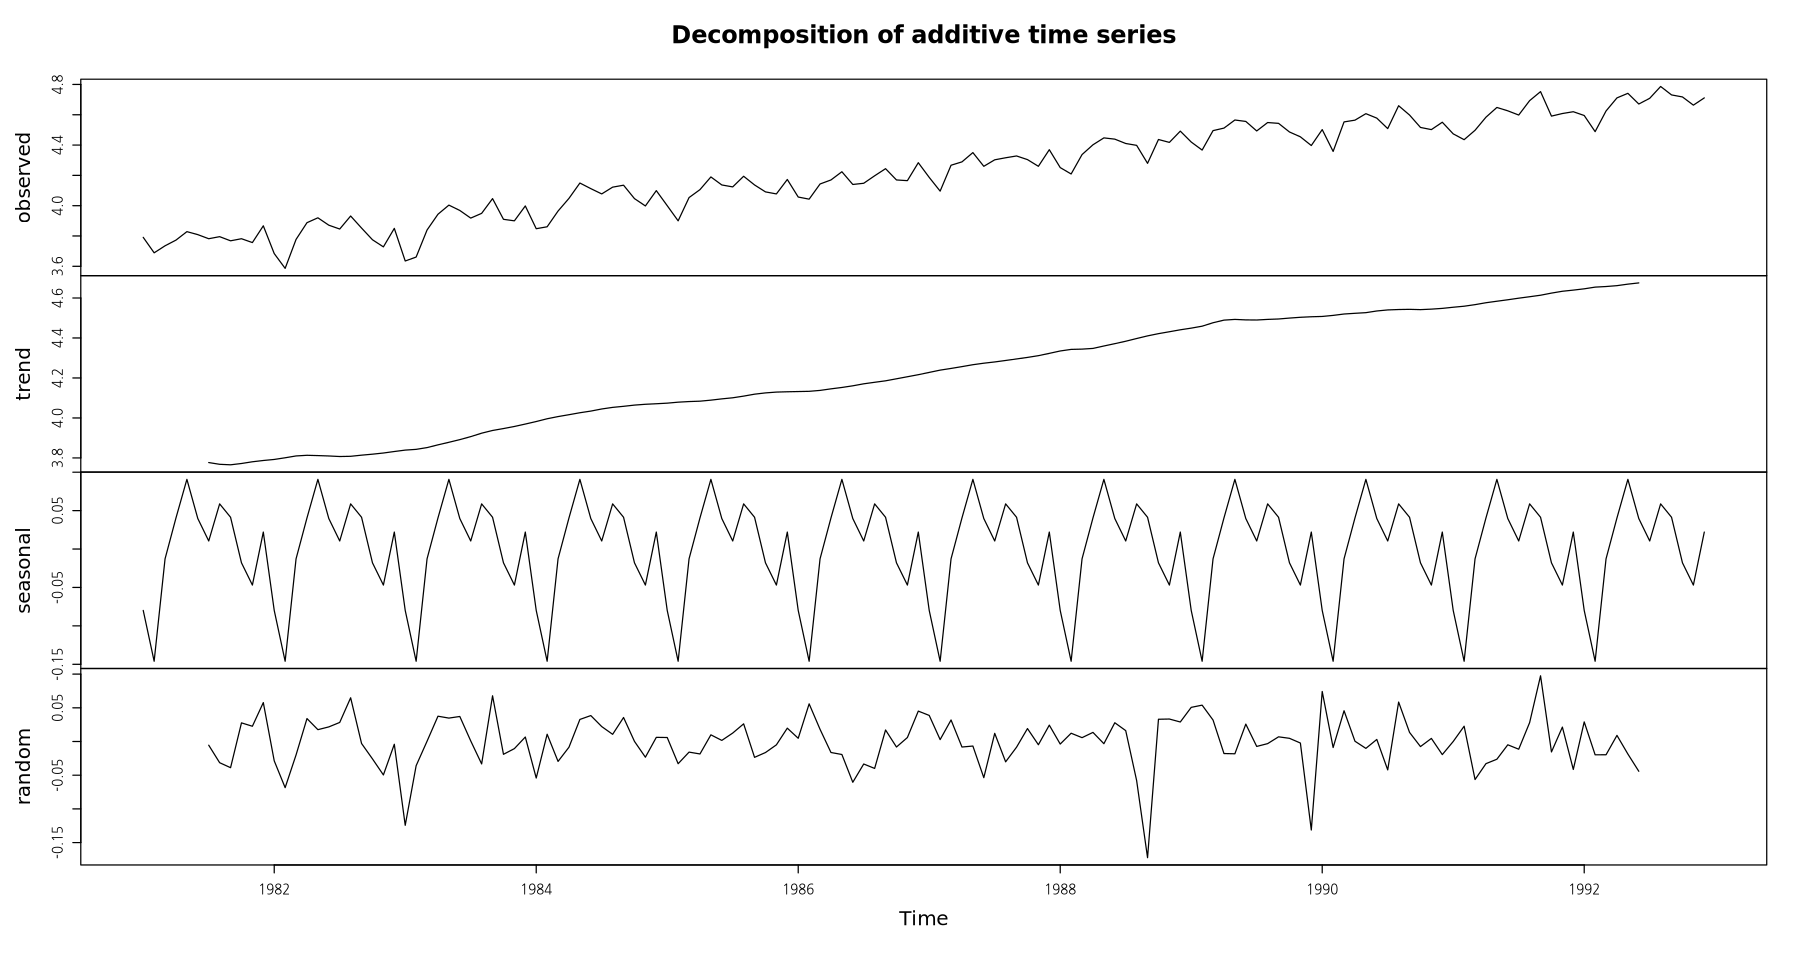

In [43]:
plot(dec_fit)

> 관측값, 추세, 계절성분, 불규칙성분의 플랏을 한번에 그려줌 ㅇㅇ

`-` 승법모형

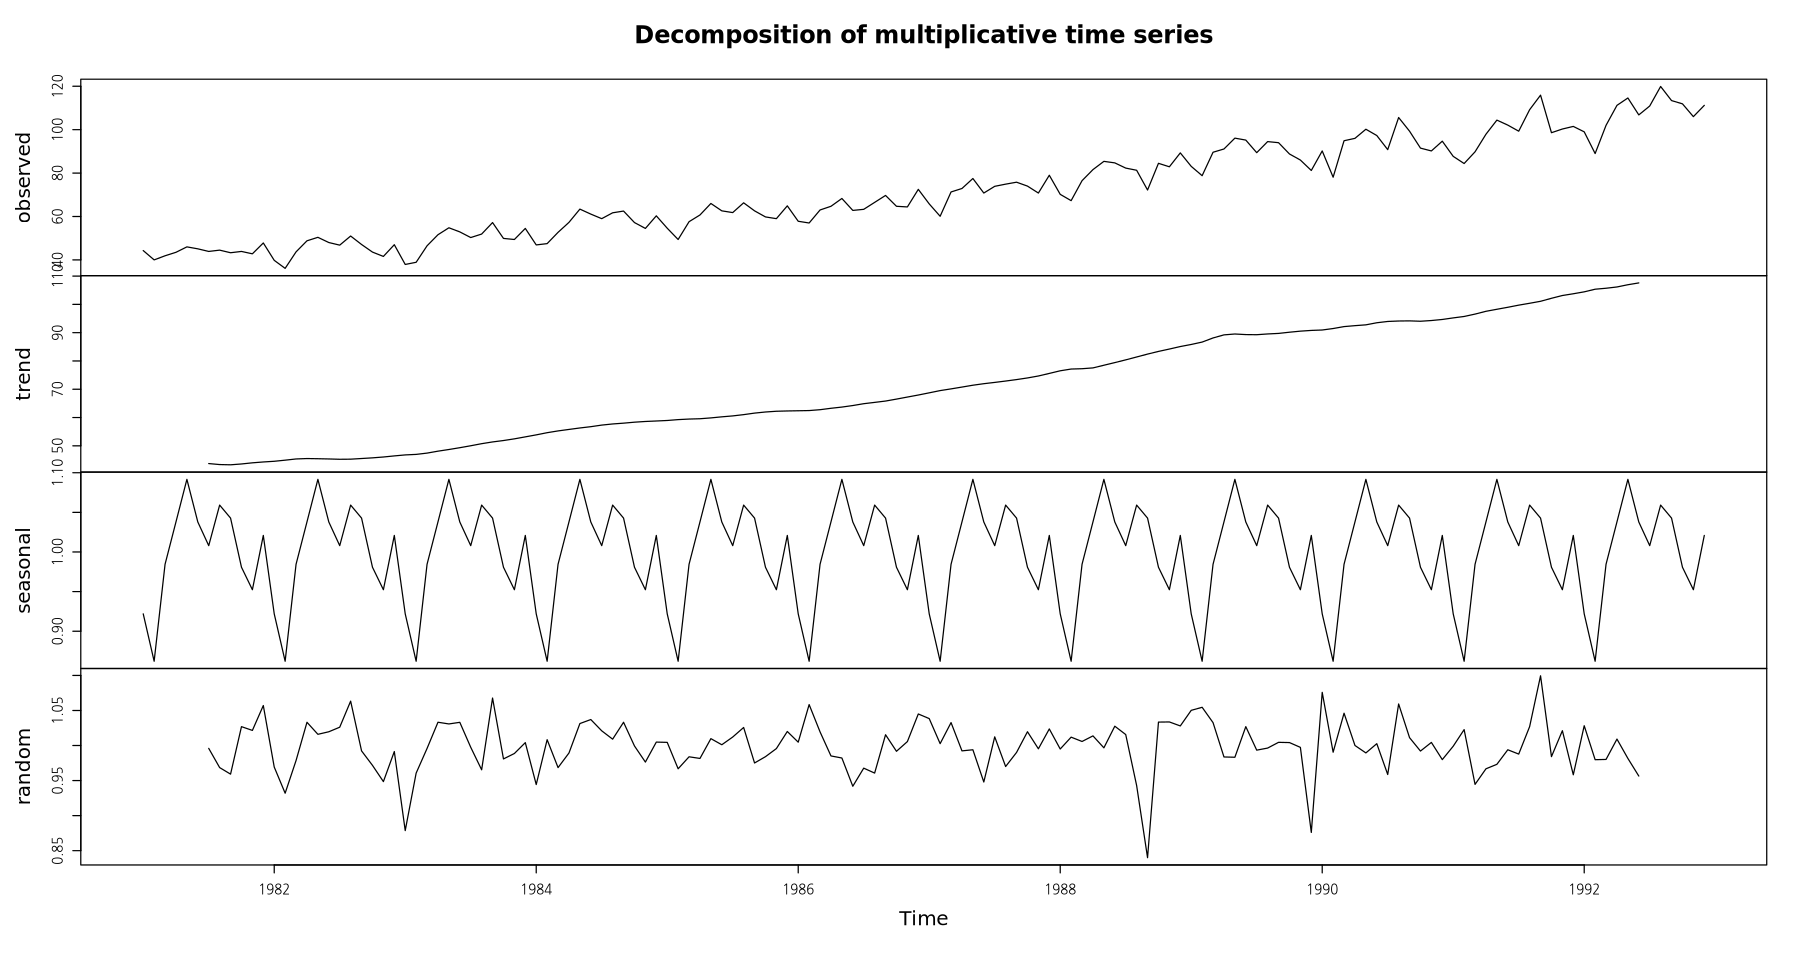

In [44]:
dec_fit2 <- decompose(food, type = "multiplicative") ## 로그변환 안하고 승법모형
plot(dec_fit2)

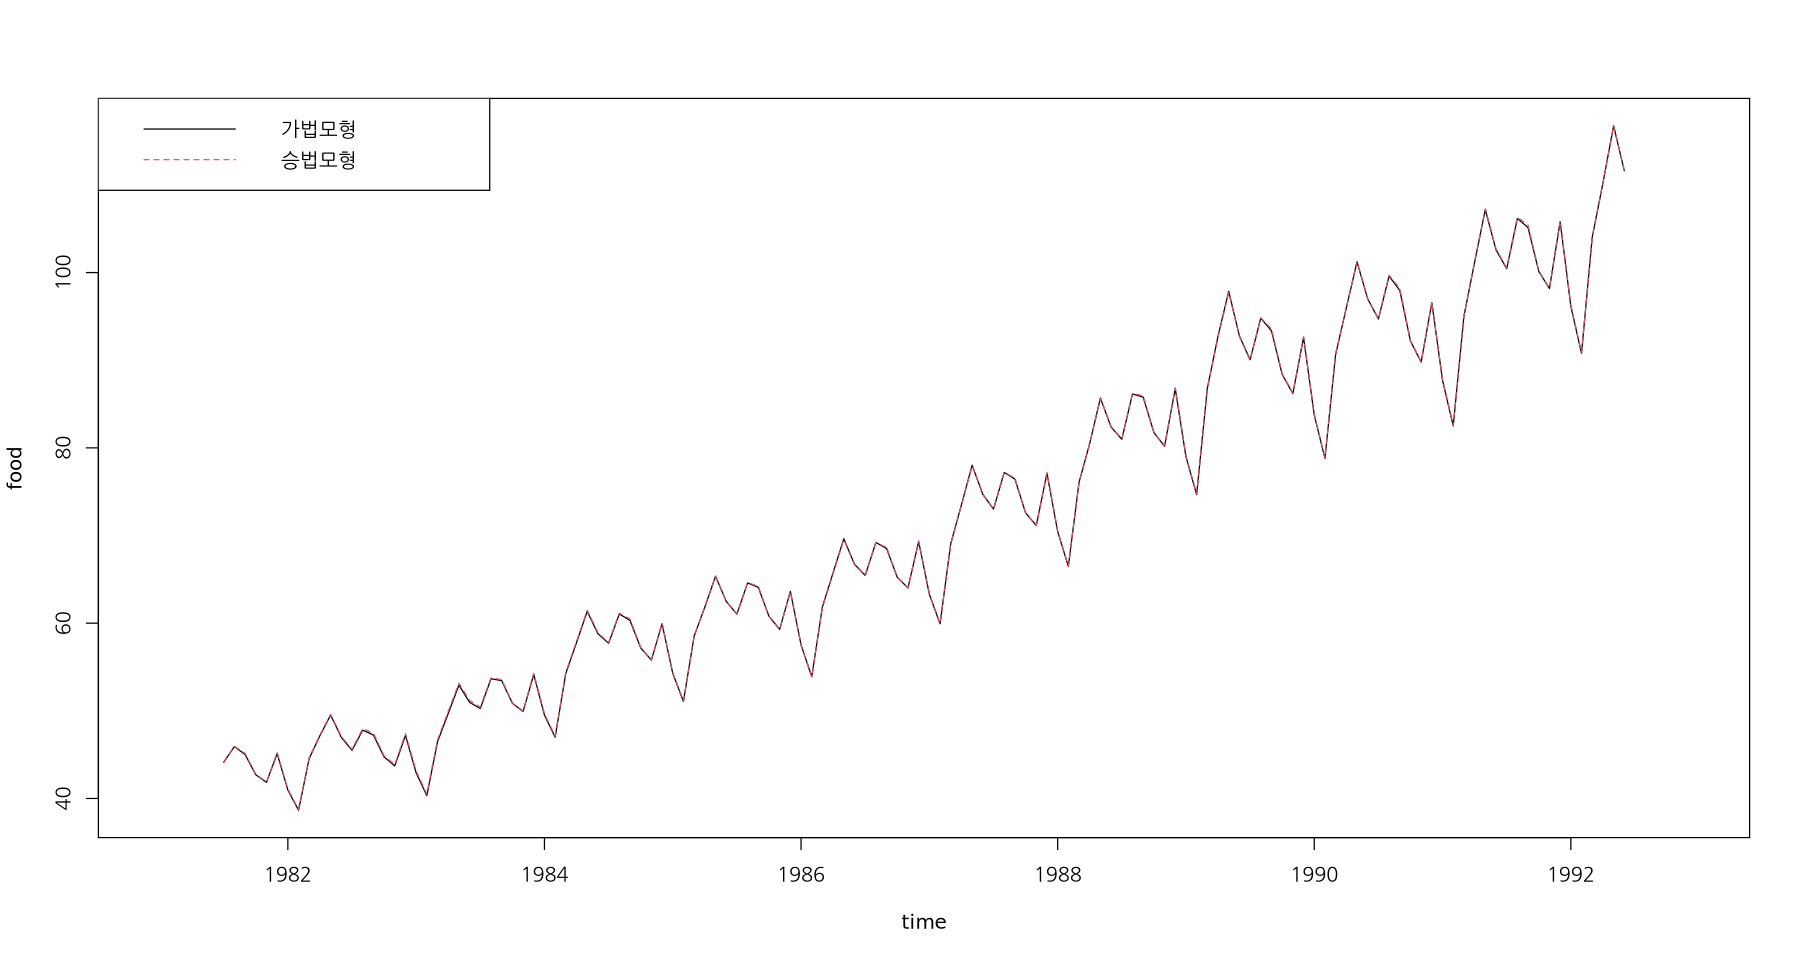

In [45]:
## 가법모형 vs. 승법모형
pred_dec <-dec_fit$trend+dec_fit$seasonal
pred_dec2 <-dec_fit2$trend*dec_fit2$seasonal
ts.plot(exp(pred_dec), pred_dec2, col=1:2, lty=1:2, ylab="food", xlab="time")
legend("topleft", lty=1:2, col=1:2, c("가법모형", "승법모형"))

> 거의 똑같음.

In [46]:
sum((food-exp(pred_dec))^2, na.rm = T)
sum((food-pred_dec2)^2, na.rm = T)

[1] 1023.548

[1] 1018.603

> 로그변환 안하고 승법모형을 써도 상관이 없다.

### D. `stl` 함수를 이용한 분해법

로컬하게 모형을 구성하는, 추세모형과 관련이 있는 함수(Loess, 커널 함수 사용, 비모수적 추정)

`decompose`에는 무적권 데이터에 time.series를 넣어야 하지만, `stl`에는 그럴 필요가 없다.

In [51]:
stl_fit1 <- stl(log_food, s.window=12) ## 계절 주기만 명시해주면 됨(윈도우의 크기)
stl_fit1

 Call:
 stl(x = log_food, s.window = 12)

Components
             seasonal    trend     remainder
Jan 1981 -0.090355040 3.789108  0.0922314967
Feb 1981 -0.147931392 3.787232  0.0495793240
Mar 1981 -0.019896144 3.785355 -0.0301728541
Apr 1981  0.038295797 3.783478 -0.0490129862
May 1981  0.094538719 3.782254 -0.0481517327
Jun 1981  0.043787287 3.781031 -0.0159357336
Jul 1981  0.016322459 3.779807 -0.0142151139
Aug 1981  0.054057673 3.779134 -0.0377023021
Sep 1981  0.039065446 3.778461 -0.0493734719
Oct 1981 -0.017797397 3.777788  0.0219242129
Nov 1981 -0.051814854 3.783126  0.0252270946
Dec 1981  0.040229276 3.788464  0.0383321435
Jan 1982 -0.089173122 3.793803 -0.0207625430
Feb 1982 -0.147042503 3.798761 -0.0654256842
Mar 1982 -0.018690332 3.803720 -0.0076810928
Apr 1982  0.038138951 3.808678  0.0409133606
May 1982  0.094194552 3.809407  0.0163898255
Jun 1982  0.043112958 3.810136  0.0179524600
Jul 1982  0.015984650 3.810864  0.0190341639
Aug 1982  0.053498710 3.813796  0.0645310601
Se

In [52]:
head(stl_fit1$time.series)

,seasonal,trend,remainder
Jan 1981,-0.09035504,3.789108,0.09223150
Feb 1981,-0.14793139,3.787232,0.04957932
Mar 1981,-0.01989614,3.785355,-0.03017285
Apr 1981,0.03829580,3.783478,-0.04901299
May 1981,0.09453872,3.782254,-0.04815173
Jun 1981,0.04378729,3.781031,-0.01593573


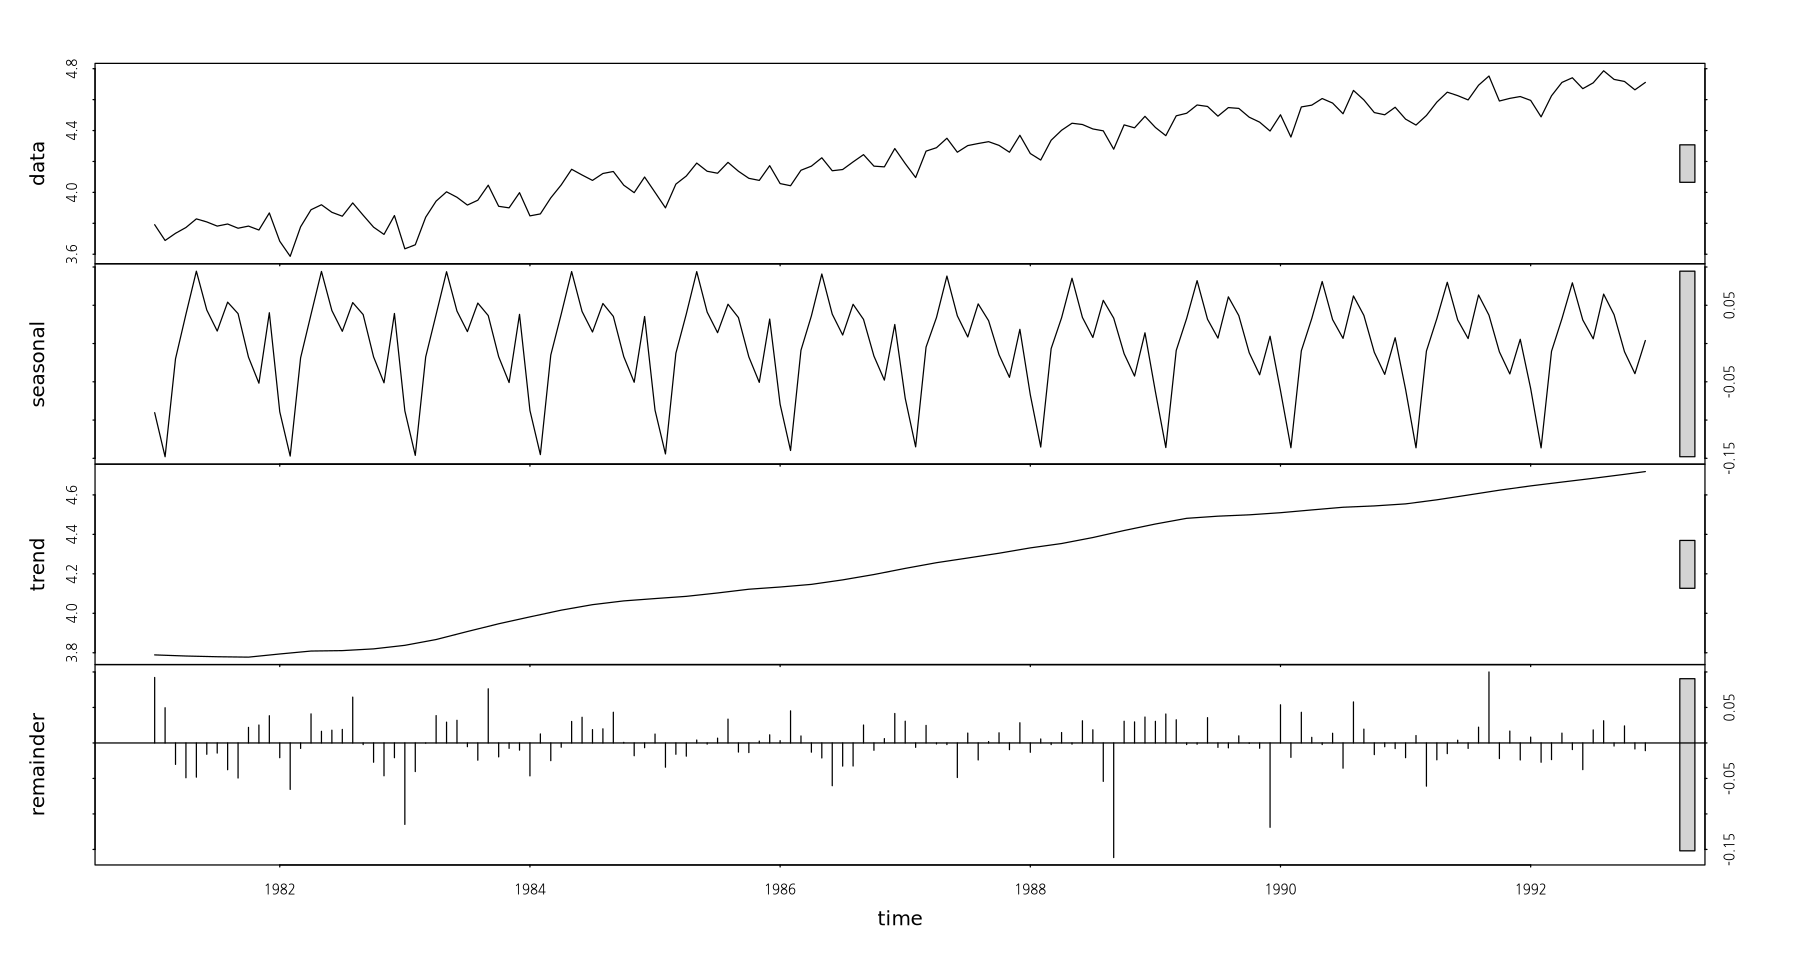

In [53]:
plot(stl_fit1)

In [57]:
t.test(stl_fit1$time.series[,3]) ## remainder


	One Sample t-test

data:  stl_fit1$time.series[, 3]
t = -0.18, df = 143, p-value = 0.8574
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.006341435  0.005282903
sample estimates:
    mean of x 
-0.0005292661 


> 0을 중심으로 움직이는 것에 문제가 없음.

In [59]:
dwtest(lm(stl_fit1$time.series[, 3]~1), alternative = "two.sided")


	Durbin-Watson test

data:  lm(stl_fit1$time.series[, 3] ~ 1)
DW = 1.64, p-value = 0.02962
alternative hypothesis: true autocorrelation is not 0


> 약간의 자기상관이 있음. 그냥 넘어가면 안되지만 넘어 갈 수도 있죠... 라네요. 애초에 가정이 없으니까 상관없나?

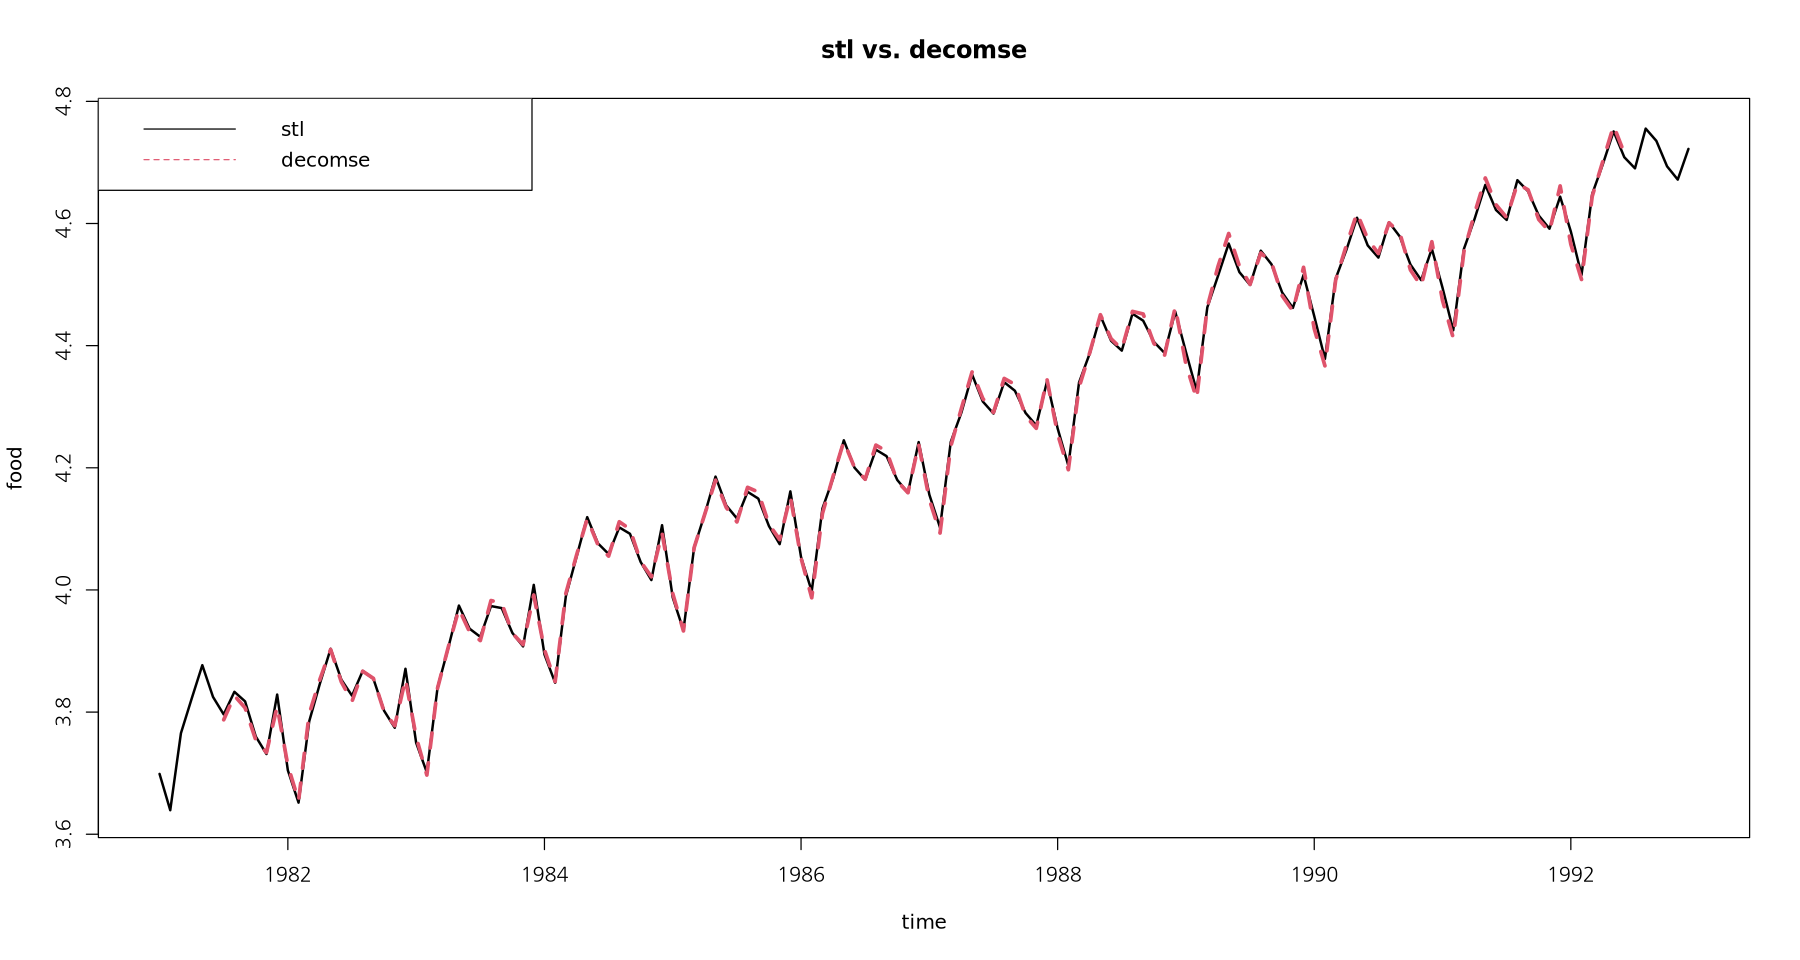

In [54]:
## stl vs. decompose
pred_stl <- stl_fit1$time.series[,1]+stl_fit1$time.series[,2]
ts.plot(pred_stl, pred_dec, col=1:2, lty=1:2, lwd=2:3, ylab="food", xlab="time",
 main="stl vs. decomse")
legend("topleft", lty=1:2, col=1:2, c("stl", "decomse"))

거의 차이가 없음. 하지만, stl의 경우 모든 시점에서 예측을 수행했음.

In [55]:
### SSE : 1-시차 후 예측 오차 제곱합
sum((log_food-pred_stl)^2) #144 : 전체 관측치
sum((log_food-pred_dec)^2, na.rm=T) #144-12=132 : 덜 사용함

[1] 0.1780719

[1] 0.182256

> summation이 다름. 따라서 MSE를 비교하는 것이 공정함.

In [56]:
### MSE : 1-시차 후 예측 오차 제곱합의 평균
sum((log_food-pred_stl)^2)/144
sum((log_food-pred_dec)^2, na.rm=T)/132

[1] 0.00123661

[1] 0.001380727

> SSE를 쓰는 것 보다 mean을 쓰는 게 더 낫다! 자유도 왜 안빼나요? 몰라요...

## 추세에 의한 분석법

### A. 가법모형 additive model

$$Z_t = T_t + S_t + I_t$$

> 계절성분의 진폭이 시간에 따라 일정할 때 사용

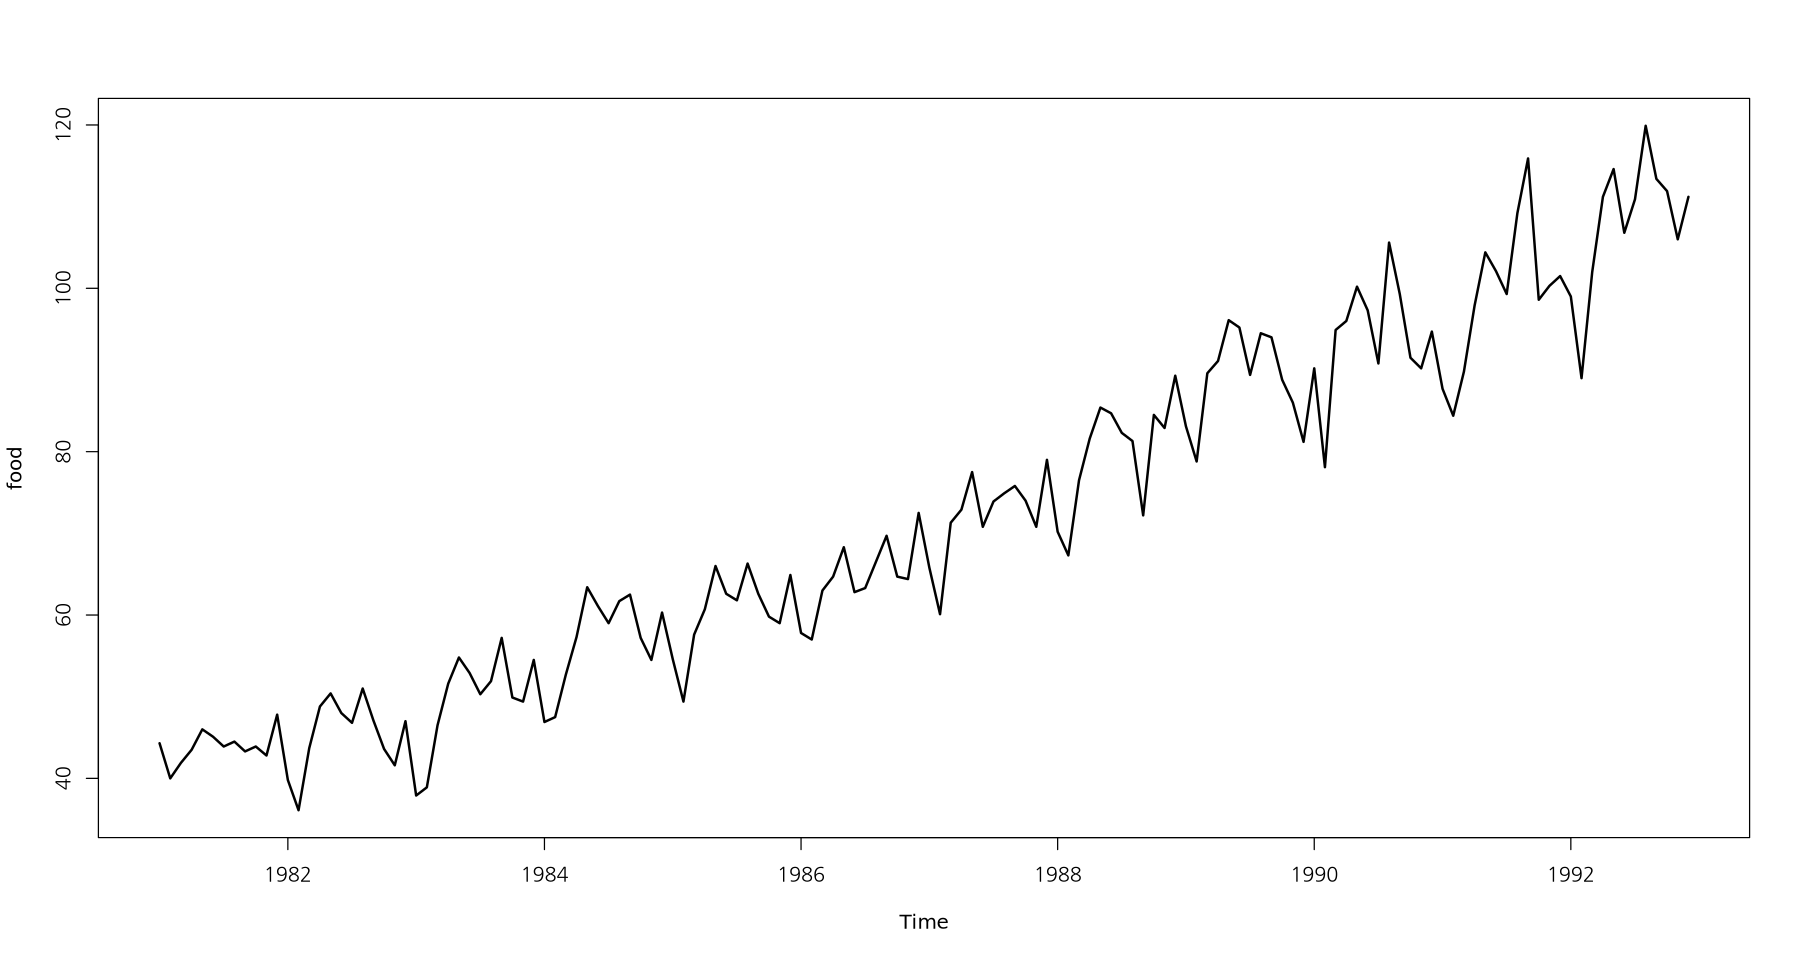

In [60]:
z = scan("food.txt")
t = 1:length(z)
food = ts(z, start = c(1981, 1), frequency = 12)

plot.ts(food, lwd = 2)

> 진폭이 증가하고 있으므로 이대로라면 승법모형이 적합함. 하지만 로그 변환을 통해 가법 모형으로 적합할 수 있음.

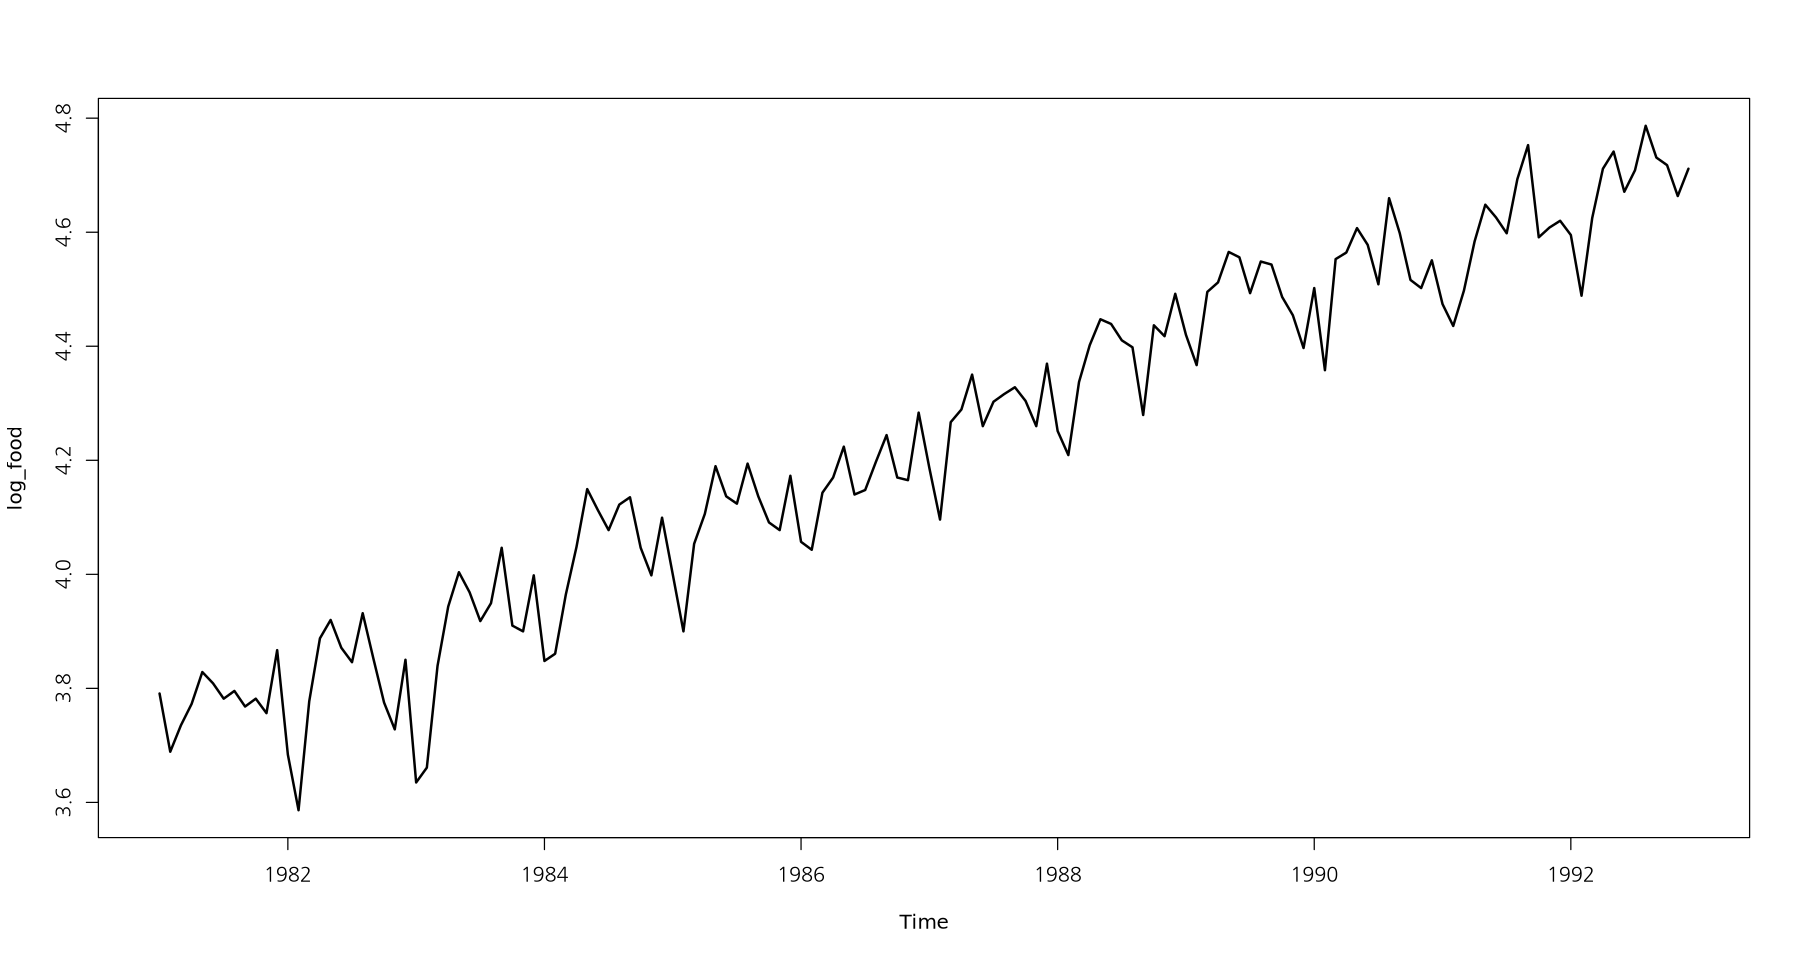

In [61]:
log_food = log(food)
plot.ts(log_food, lwd = 2)

> 진폭이 시간에 따라 거의 비슷하게 감

`-` 1. 추세성분 추정 : $Z_t$에 추세모형 적합 $Z_t = \beta_0 + \beta_1 t + \epsilon_t$ 적합

In [62]:
fit = lm(log_food~t)
summary(fit)


Call:
lm(formula = log_food ~ t)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.251154 -0.042190  0.009368  0.051058  0.147910 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3.705715   0.012870  287.94   <2e-16 ***
t           0.007216   0.000154   46.86   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.07682 on 142 degrees of freedom
Multiple R-squared:  0.9393,	Adjusted R-squared:  0.9388 
F-statistic:  2195 on 1 and 142 DF,  p-value: < 2.2e-16


추정된 추세성분: $\hat T_t = 3.706 + 0.007 t$

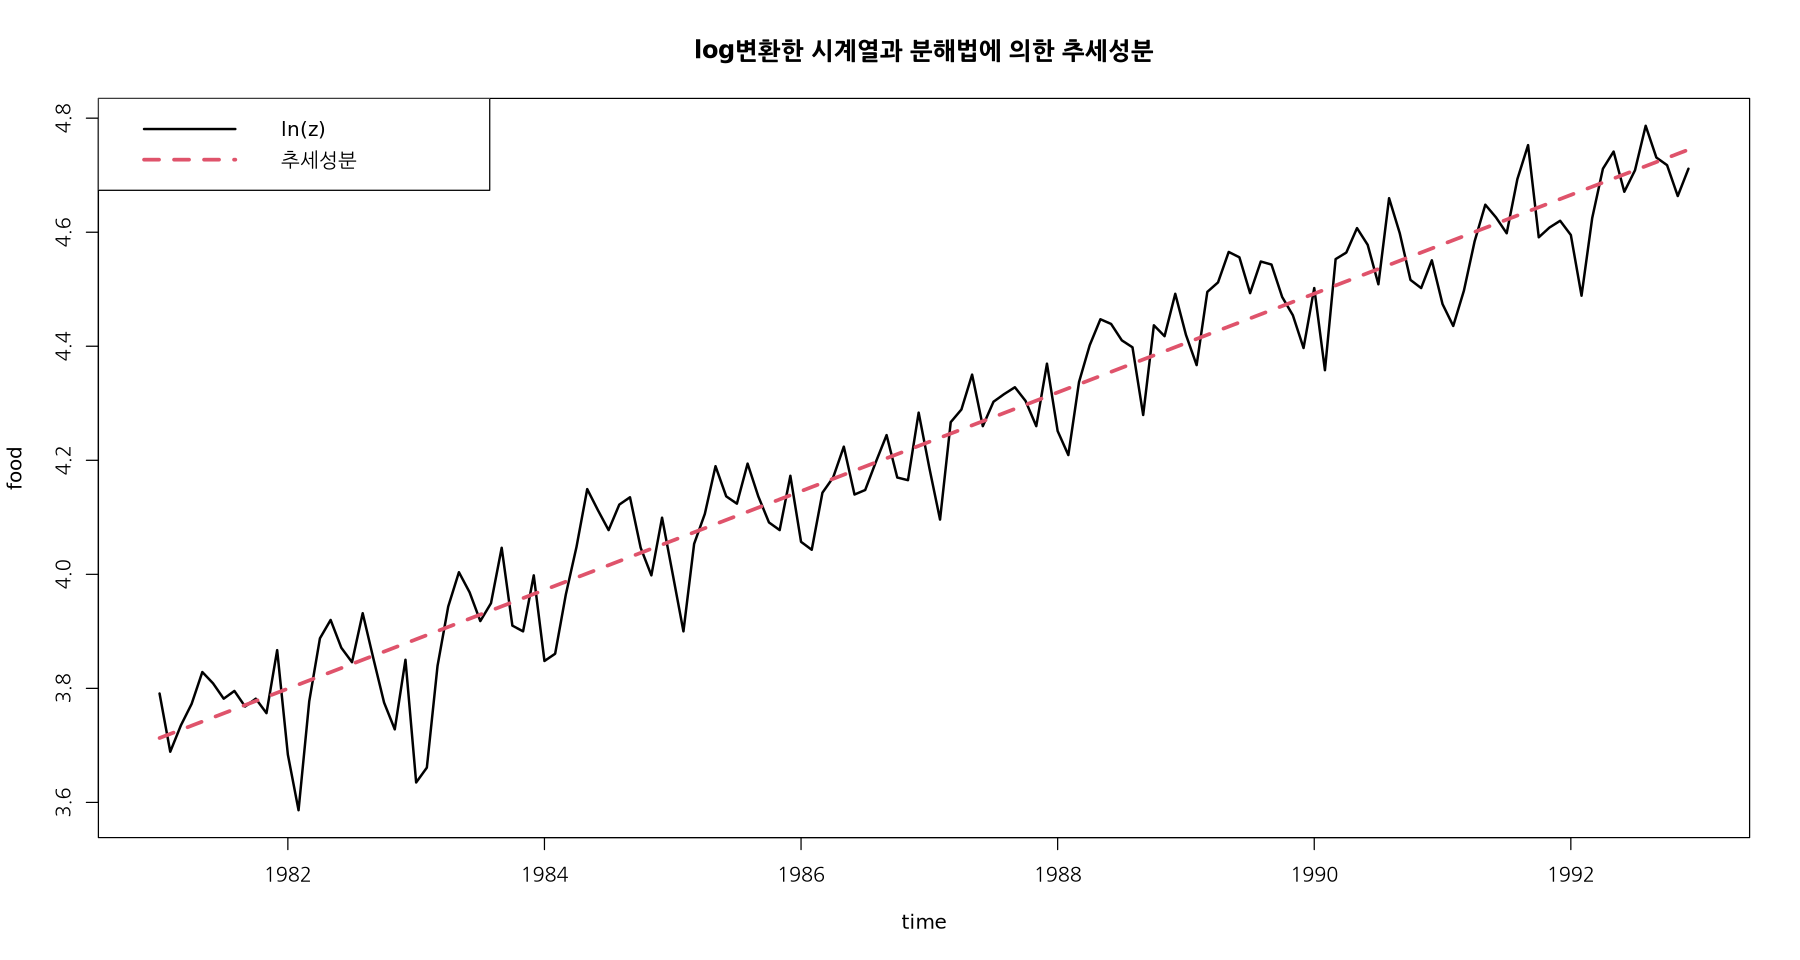

In [64]:
hat_Tt <- fitted(fit)
ts.plot(log_food, hat_Tt,
        col=1:2,
        lty=1:2,
        lwd=2:3,
        ylab="food", xlab="time",
        main="log변환한 시계열과 분해법에 의한 추세성분")
legend("topleft", lty=1:2, col=1:2, lwd=2:3, c("ln(z)", "추세성분"))

`-` 2. 계절성분 추정 : $Z_t - \hat T_t = \delta_1 I_1 + \cdots + \delta_{12}I_{12} + \epsilon_t$ 적합

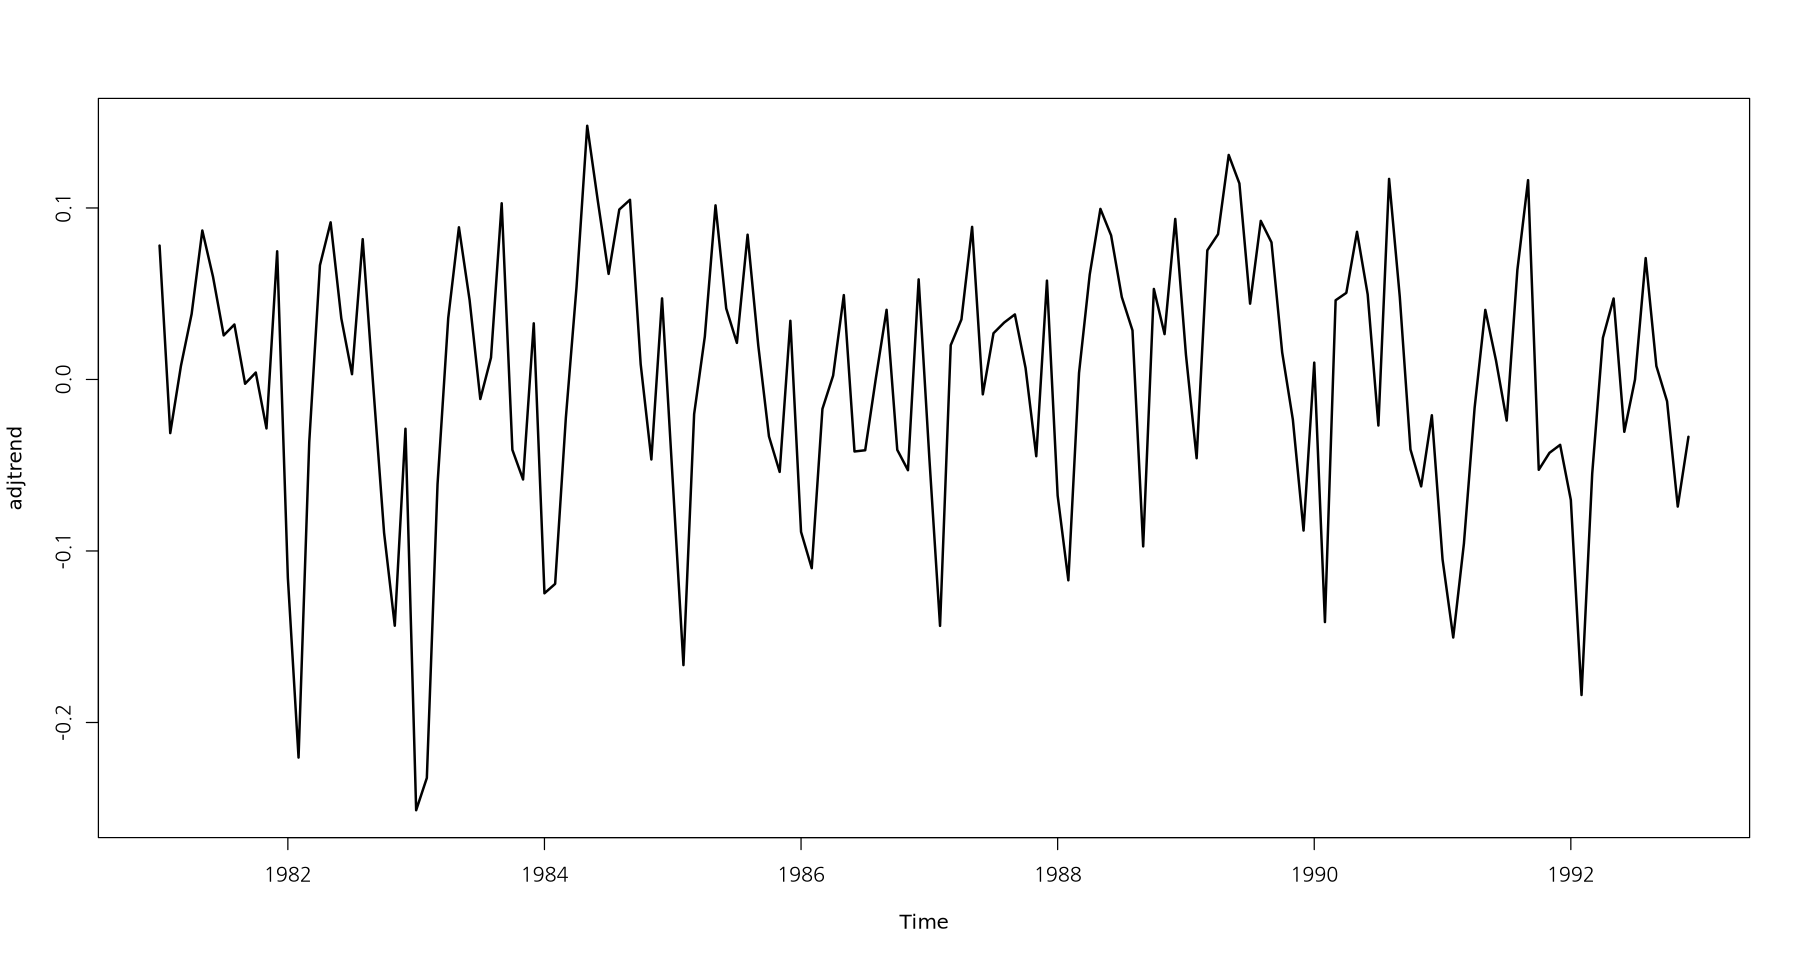

In [65]:
## 원시계열에서 추세성분 조정
adjtrend = log_food-hat_Tt ## 여전히 frequency = 12 인 time.series
plot.ts(adjtrend, lwd=2)

In [68]:
y = factor(cycle(adjtrend)) ## t를 범주형 변수로 바꿔줌

fit1 = lm(adjtrend~0+y) ## 절편을 0이라 가정한 회귀모형
summary(fit1)


Call:
lm(formula = adjtrend ~ 0 + y)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.182321 -0.028501  0.000597  0.025663  0.146887 

Coefficients:
    Estimate Std. Error t value Pr(>|t|)    
y1  -0.06883    0.01423  -4.837 3.61e-06 ***
y2  -0.13853    0.01423  -9.735  < 2e-16 ***
y3  -0.01290    0.01423  -0.907 0.366289    
y4   0.03840    0.01423   2.699 0.007872 ** 
y5   0.08825    0.01423   6.201 6.69e-09 ***
y6   0.03871    0.01423   2.720 0.007401 ** 
y7   0.01061    0.01423   0.746 0.457221    
y8   0.05972    0.01423   4.197 4.94e-05 ***
y9   0.03776    0.01423   2.653 0.008945 ** 
y10 -0.01856    0.01423  -1.304 0.194518    
y11 -0.05041    0.01423  -3.542 0.000549 ***
y12  0.01577    0.01423   1.108 0.269816    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0493 on 132 degrees of freedom
Multiple R-squared:  0.6172,	Adjusted R-squared:  0.5824 
F-statistic: 17.73 on 12 and 132 DF,  p-value: < 2.2e-16


> 해당 추세성분들은 계절별 표본평균값이 들어감.

$\hat S_t = -0.069 I_1 - 0.139I_2 + \cdots + 0.016 I_{12}$ : 유의하지 않은 값은 0이라고 써도 상관 없어요.

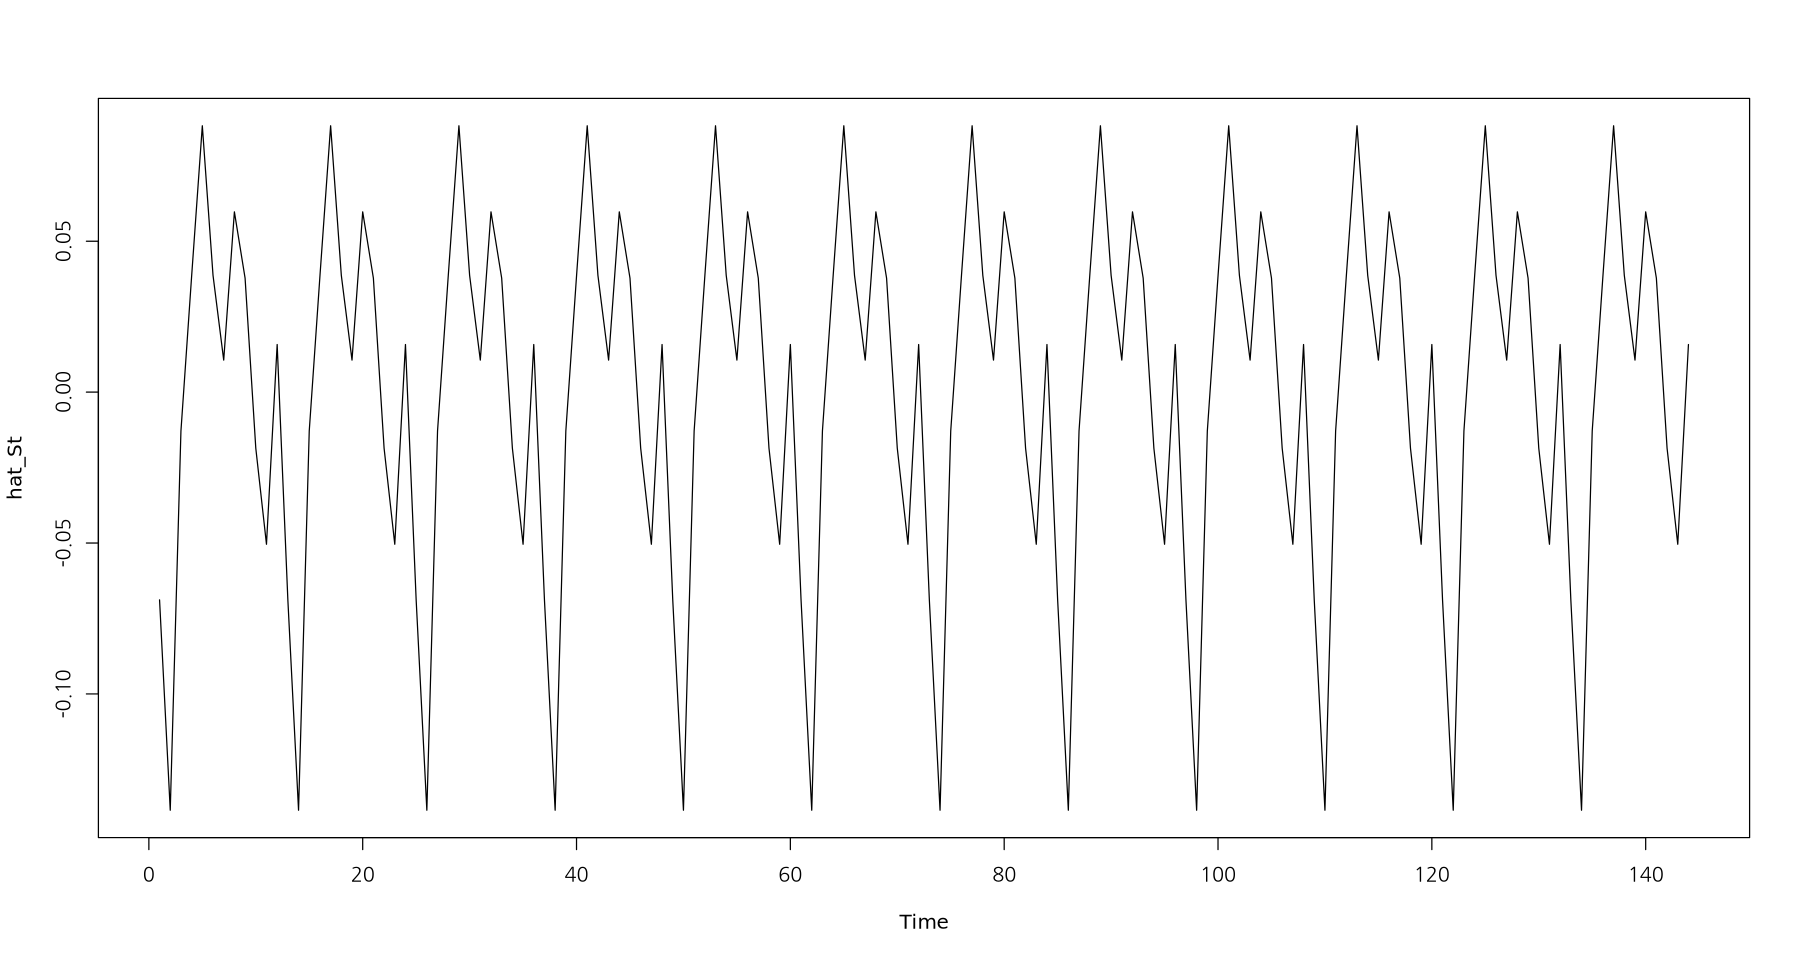

In [69]:
hat_St = fitted(fit1)
ts.plot(hat_St)

> 평균이 살짝 아래로 치우쳐진 계절성분으로 보임.

`-` 3. 불규칙 성분 $\hat I_t = Z_t - \hat T_t - \hat S_t$

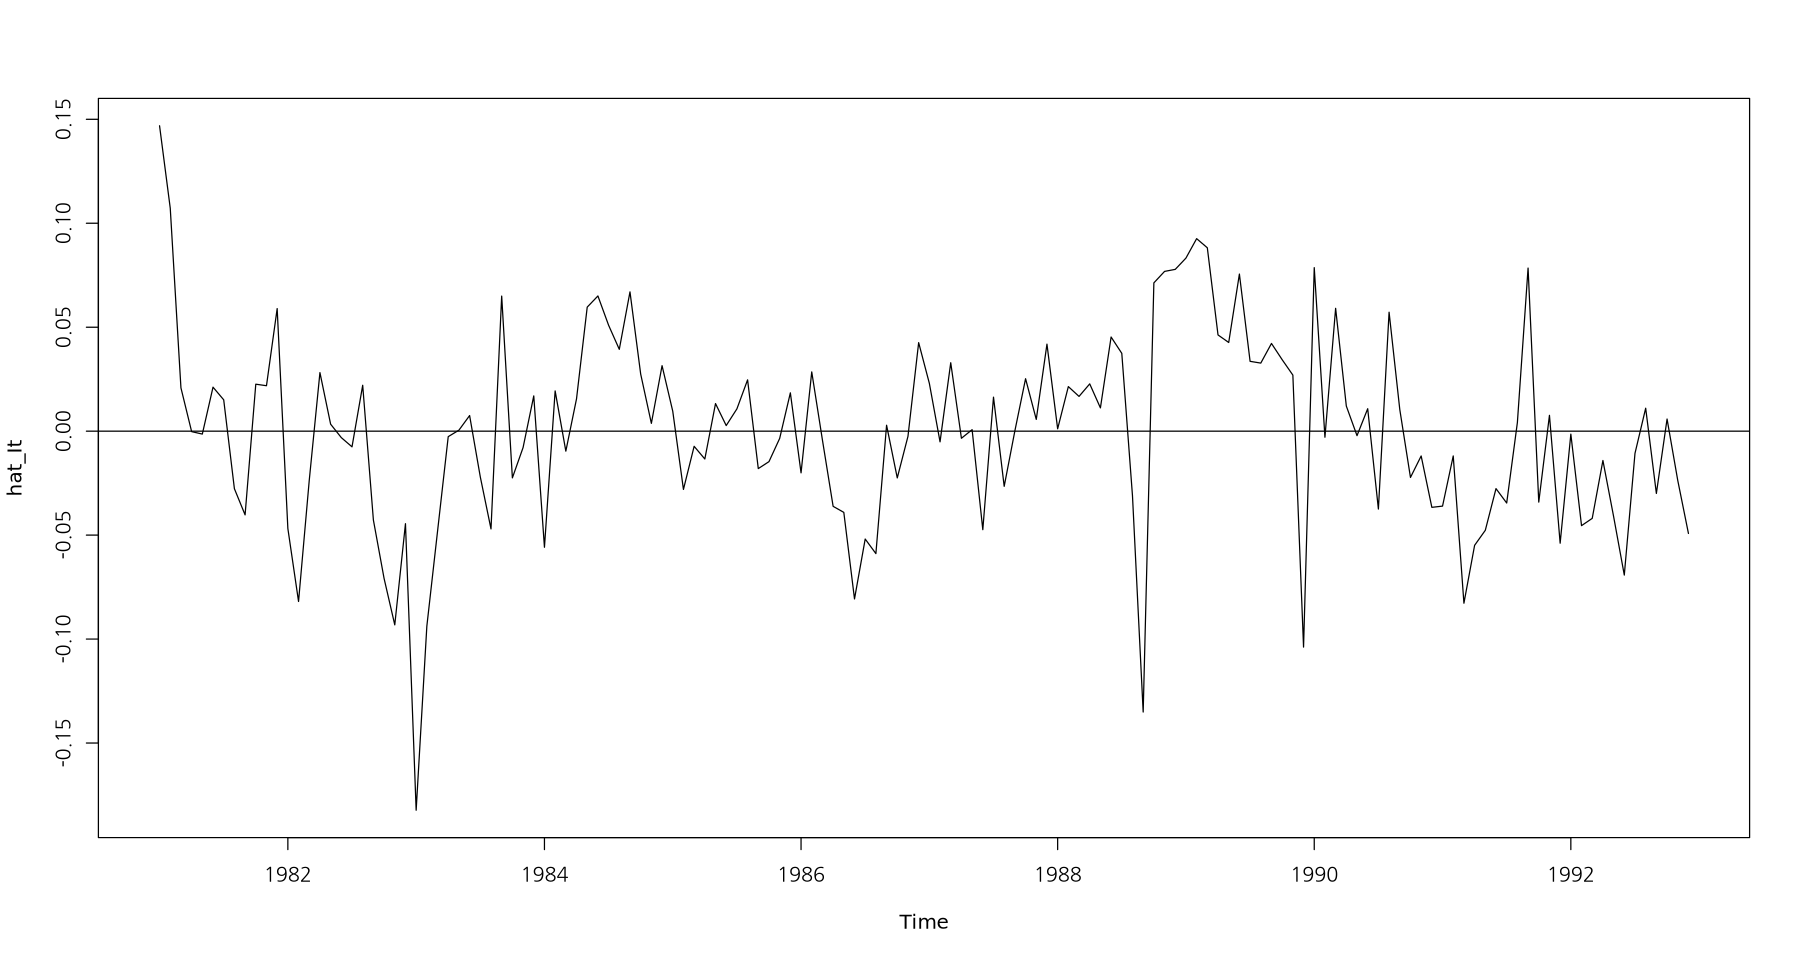

In [70]:
hat_It = log_food - hat_Tt - hat_St
ts.plot(hat_It); abline(h = 0)

불규칙 성분은 오차에 대해 적당한가를 보려는 것인데, 어떤 성질을 만족하면 좋냐면 이분산성이 없고, 0을 근처로 잘 왔다갔다하기만 하면 된다. (정규분포일 필요는 없음)

In [71]:
t.test(hat_It) ## H_0 : mu = 0


	One Sample t-test

data:  hat_It
t = 5.8812e-16, df = 143, p-value = 1
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.007801616  0.007801616
sample estimates:
 mean of x 
2.3212e-18 


In [83]:
t = 1:length(hat_It)
tmp = lm(hat_It~1+t)
bptest(tmp)


	studentized Breusch-Pagan test

data:  tmp
BP = 1.2752, df = 1, p-value = 0.2588


> 이래도 되나...?

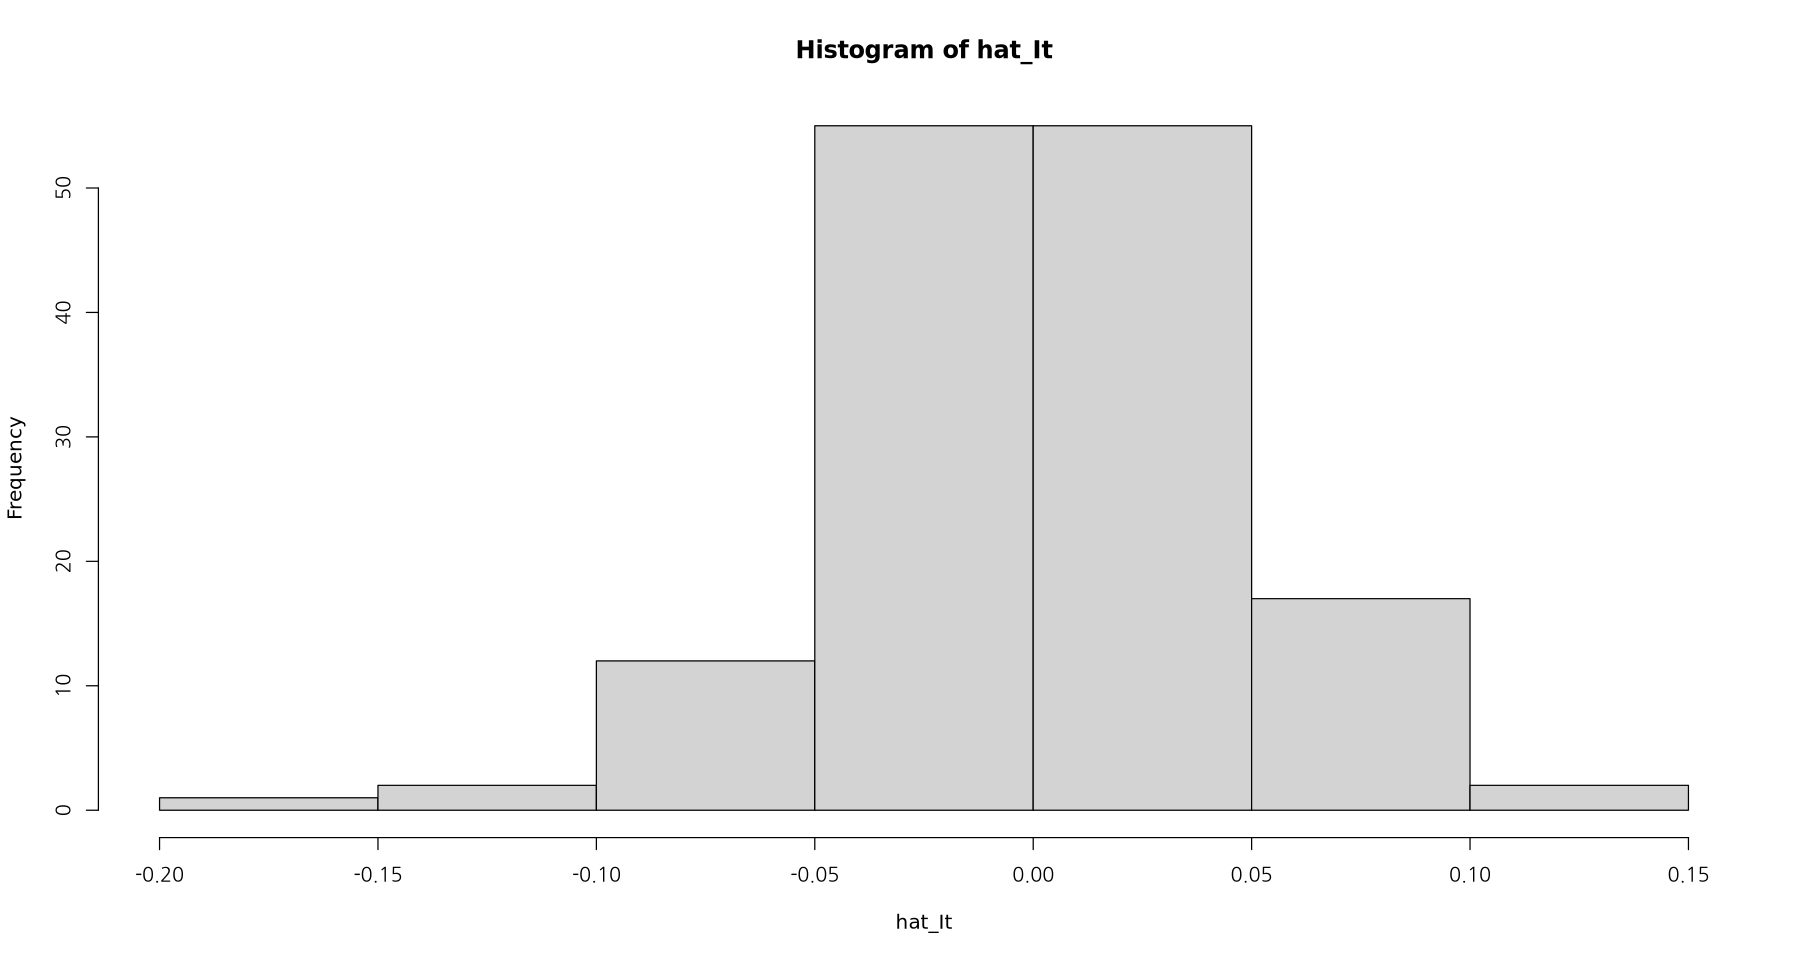

In [86]:
hist(hat_It)

아무튼 초반 시점에 이상치가 조금 있긴 하지만, 이분산성은 없는 것 같음 ㅇㅇ

In [87]:
dwtest(lm(hat_It~1), alternative = "two.sided")


	Durbin-Watson test

data:  lm(hat_It ~ 1)
DW = 1.0803, p-value = 2.748e-08
alternative hypothesis: true autocorrelation is not 0


> 잔차의 1차 양의 상관관계 있음. 실제로 뭔갈 해줘야 하지만 그럴 능력은 없다. 확인까지만 해보세요.

**결론**

불규칙 성분 분석에서는 잔차 평균이 0인지, 이분산성이 있는지를 확인하는 게 제일 중요하다.

1차 자기상관도 확인해볼 수 있으나, 아직은 뭔갈 해줄 수 없기 때문에 큰 문제는 없다. 좋진 않다.

`-` 4. 추정 : $\hat Z_t = \hat T_t + \hat S_t$

추정은 체계적 성분만으로 구성된다.

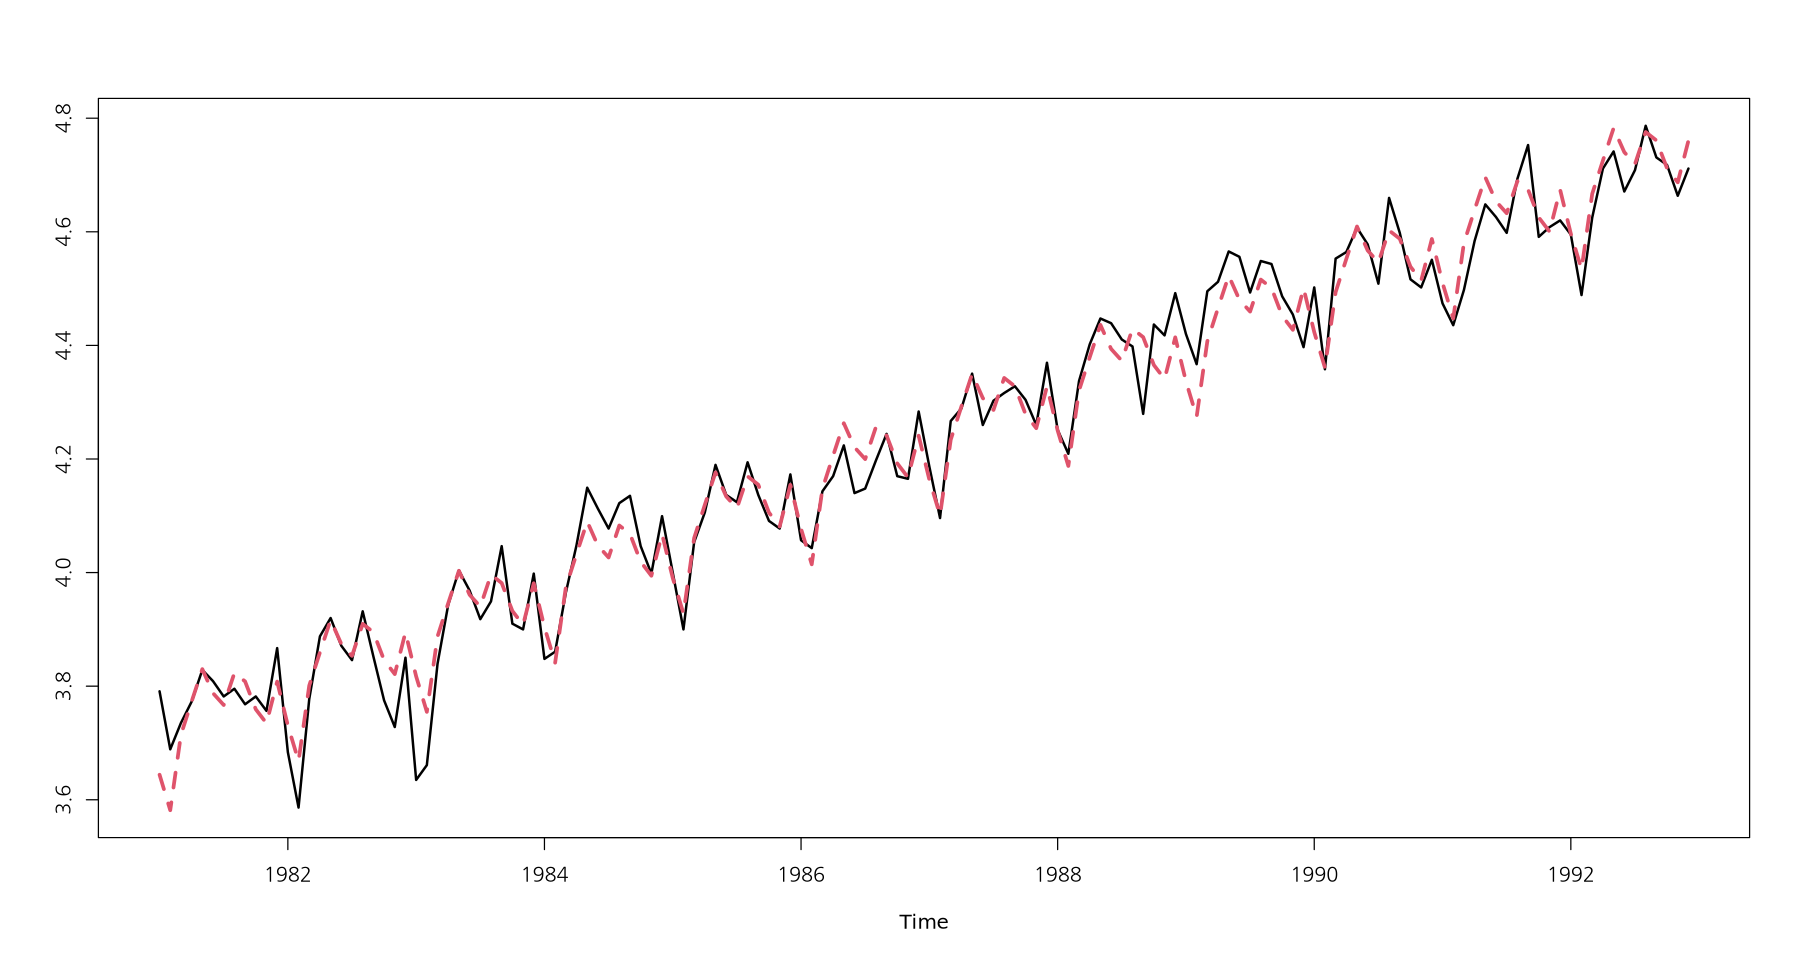

In [88]:
pred = hat_Tt + hat_St

ts.plot(log_food, pred, col = 1:2, lty = 1:2, lwd = 2:3)

초반 시점 분산이 큰 부분을 잡아내지는 못하고 있음...

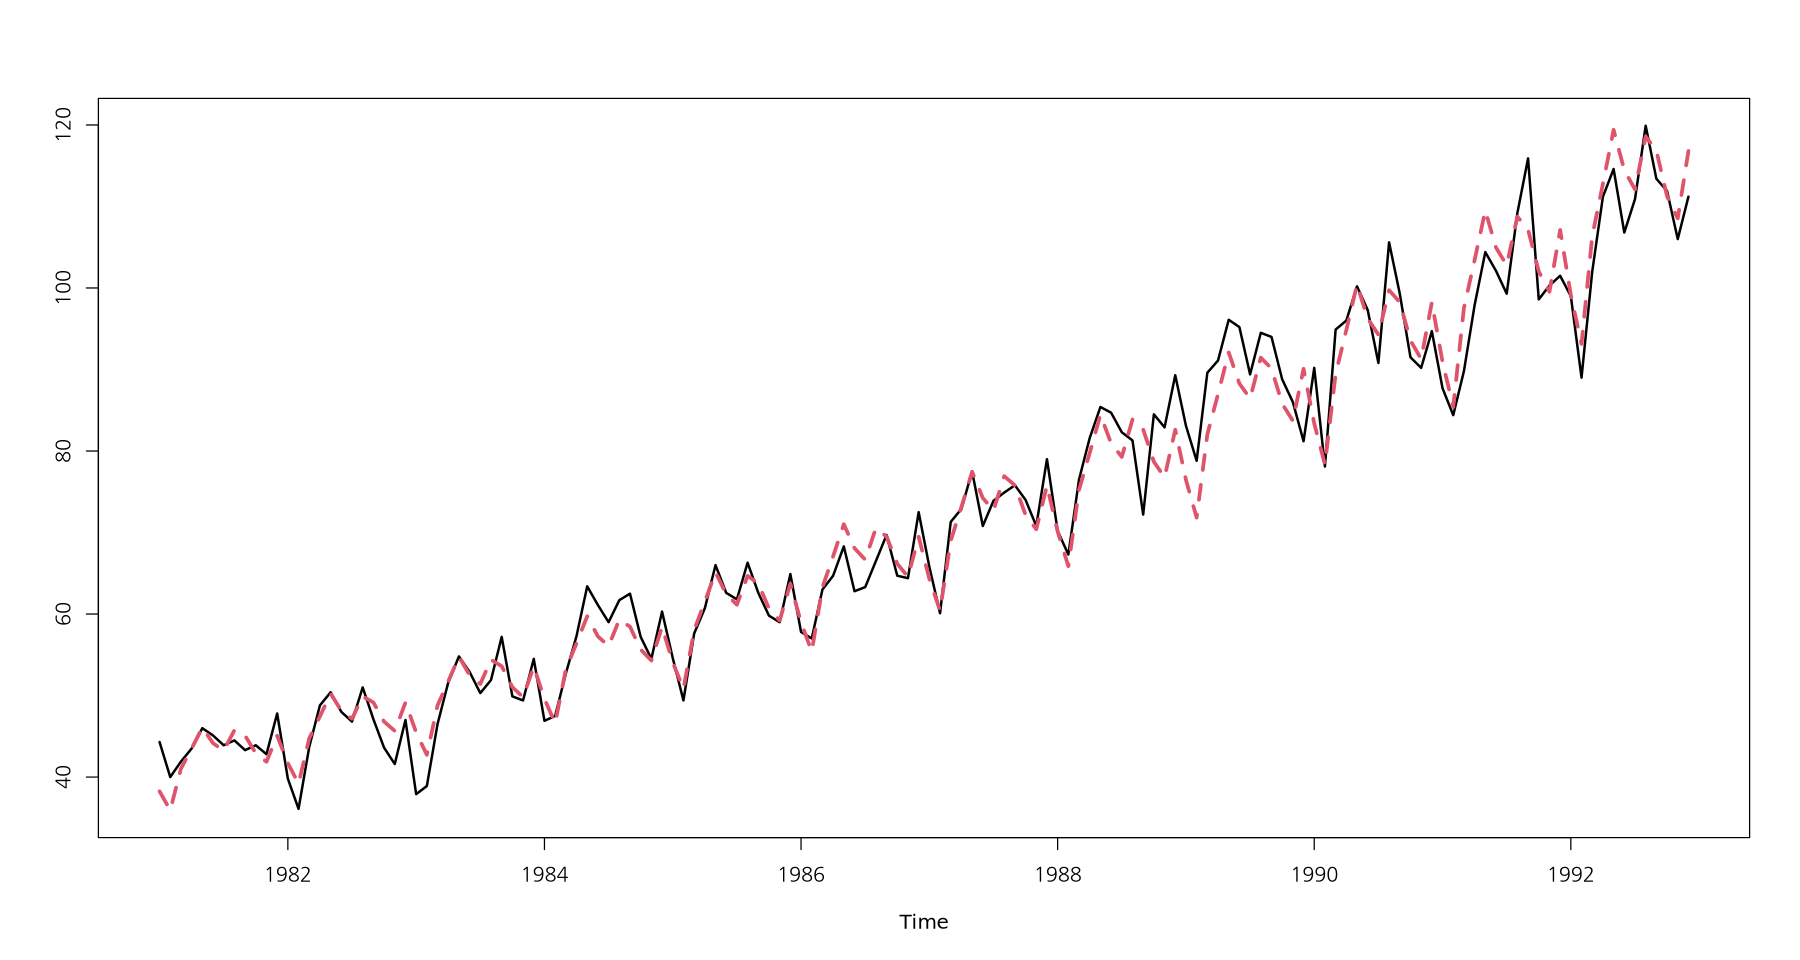

In [89]:
ts.plot(food, exp(pred), col = 1:2, lty = 1:2, lwd = 2:3)

`-` 평가

분해법을 예측모형으로 사용할 일은 없지만... 모형이 어떤 게 좋은지 비교를 하라 -> MSE를 구해서 비교를 할텐데, 어떤 데이터는 log, 어떤 데이터는 exp를 써서 비교를 할텐데 이를 꼭 오리지널 데이터로 변환한 뒤에 비교를 해야 한다.

In [90]:
SSE = sum((food-exp(pred))^2)
SSE

[1] 1636.88

### B. 승법모형 multiplicative model

$$Z_t = T_t \times S_t \times I_t$$

`-` 1. 추세성분 추정

In [92]:
fit3 <- lm(food ~ t)
summary(fit3)


Call:
lm(formula = food ~ t)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.0331  -3.4505  -0.1355   4.2911  15.3948 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 35.28614    0.95561   36.92   <2e-16 ***
t            0.50557    0.01143   44.21   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.704 on 142 degrees of freedom
Multiple R-squared:  0.9323,	Adjusted R-squared:  0.9318 
F-statistic:  1955 on 1 and 142 DF,  p-value: < 2.2e-16


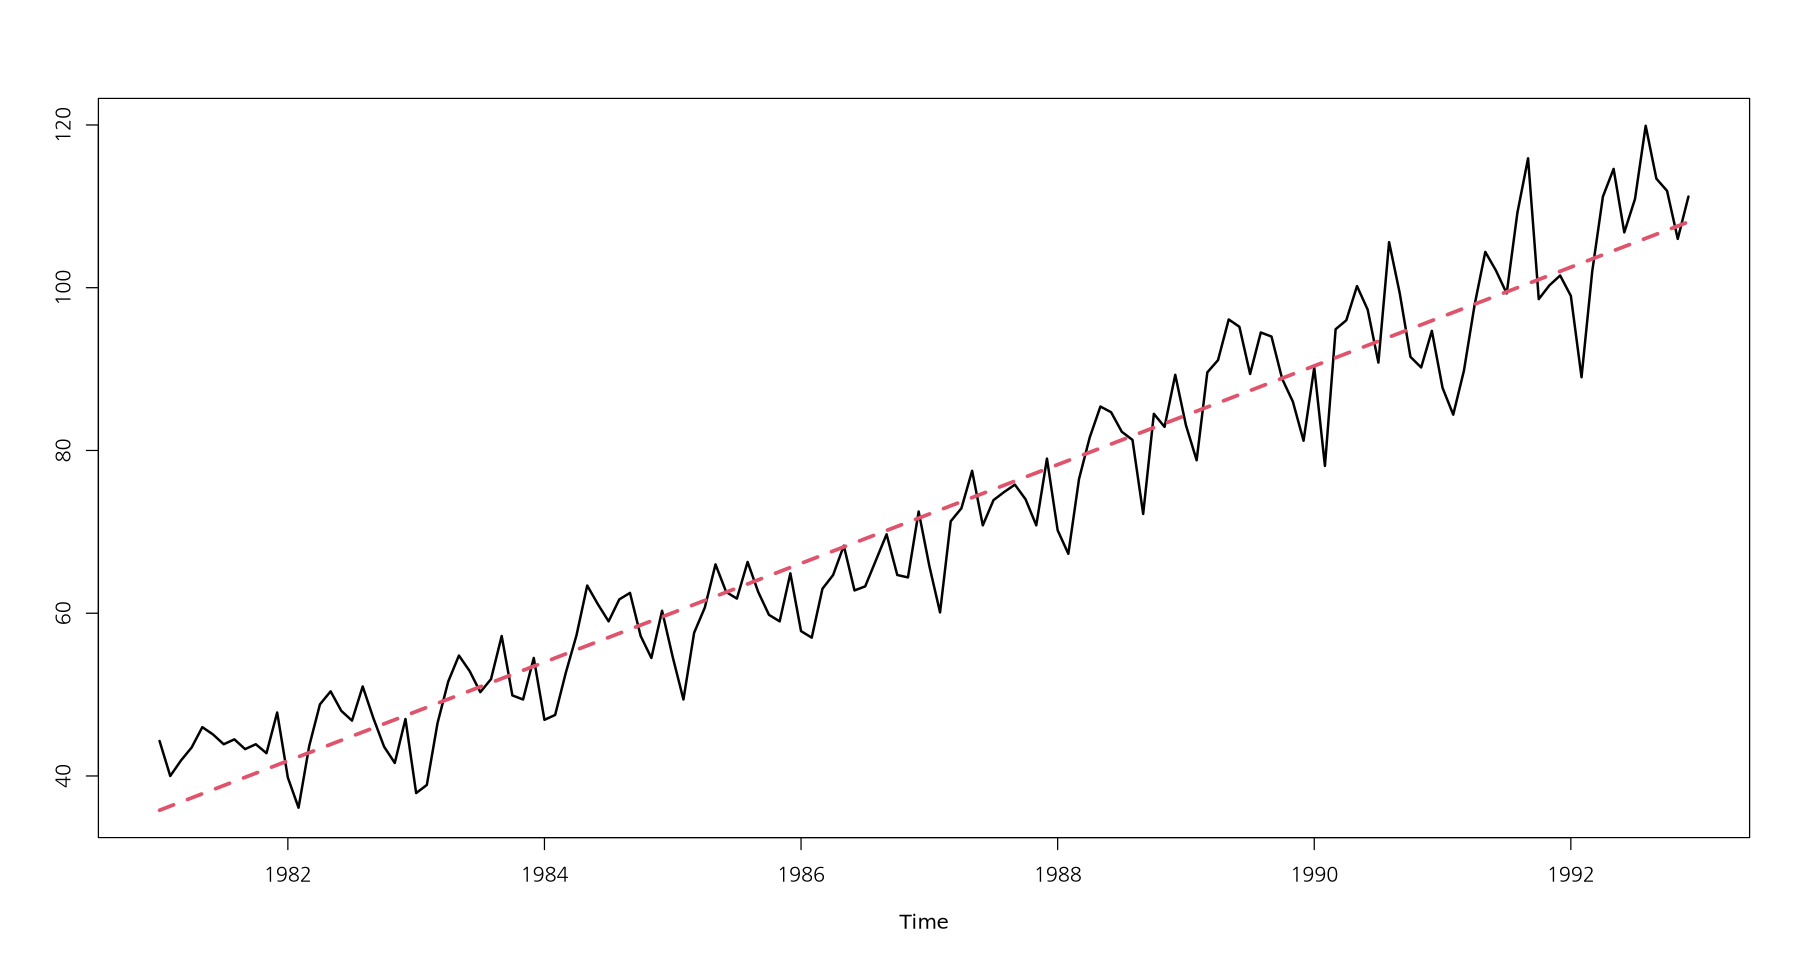

In [95]:
ts.plot(food, fitted(fit3), col = 1:2, lty = 1:2, lwd = 2:3)

> 약간 추세를 제대로 반영하지 못하고 있음 -> 2차 추세가 있지 않을까?

In [97]:
fit4 <- lm(food ~ t+I(t^2))
summary(fit4)


Call:
lm(formula = food ~ t + I(t^2))

Residuals:
    Min      1Q  Median      3Q     Max 
-16.845  -3.535   0.566   3.523  13.391 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 4.011e+01  1.346e+00  29.799  < 2e-16 ***
t           3.071e-01  4.286e-02   7.166 3.96e-11 ***
I(t^2)      1.369e-03  2.863e-04   4.779 4.37e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.31 on 141 degrees of freedom
Multiple R-squared:  0.9417,	Adjusted R-squared:  0.9409 
F-statistic:  1139 on 2 and 141 DF,  p-value: < 2.2e-16


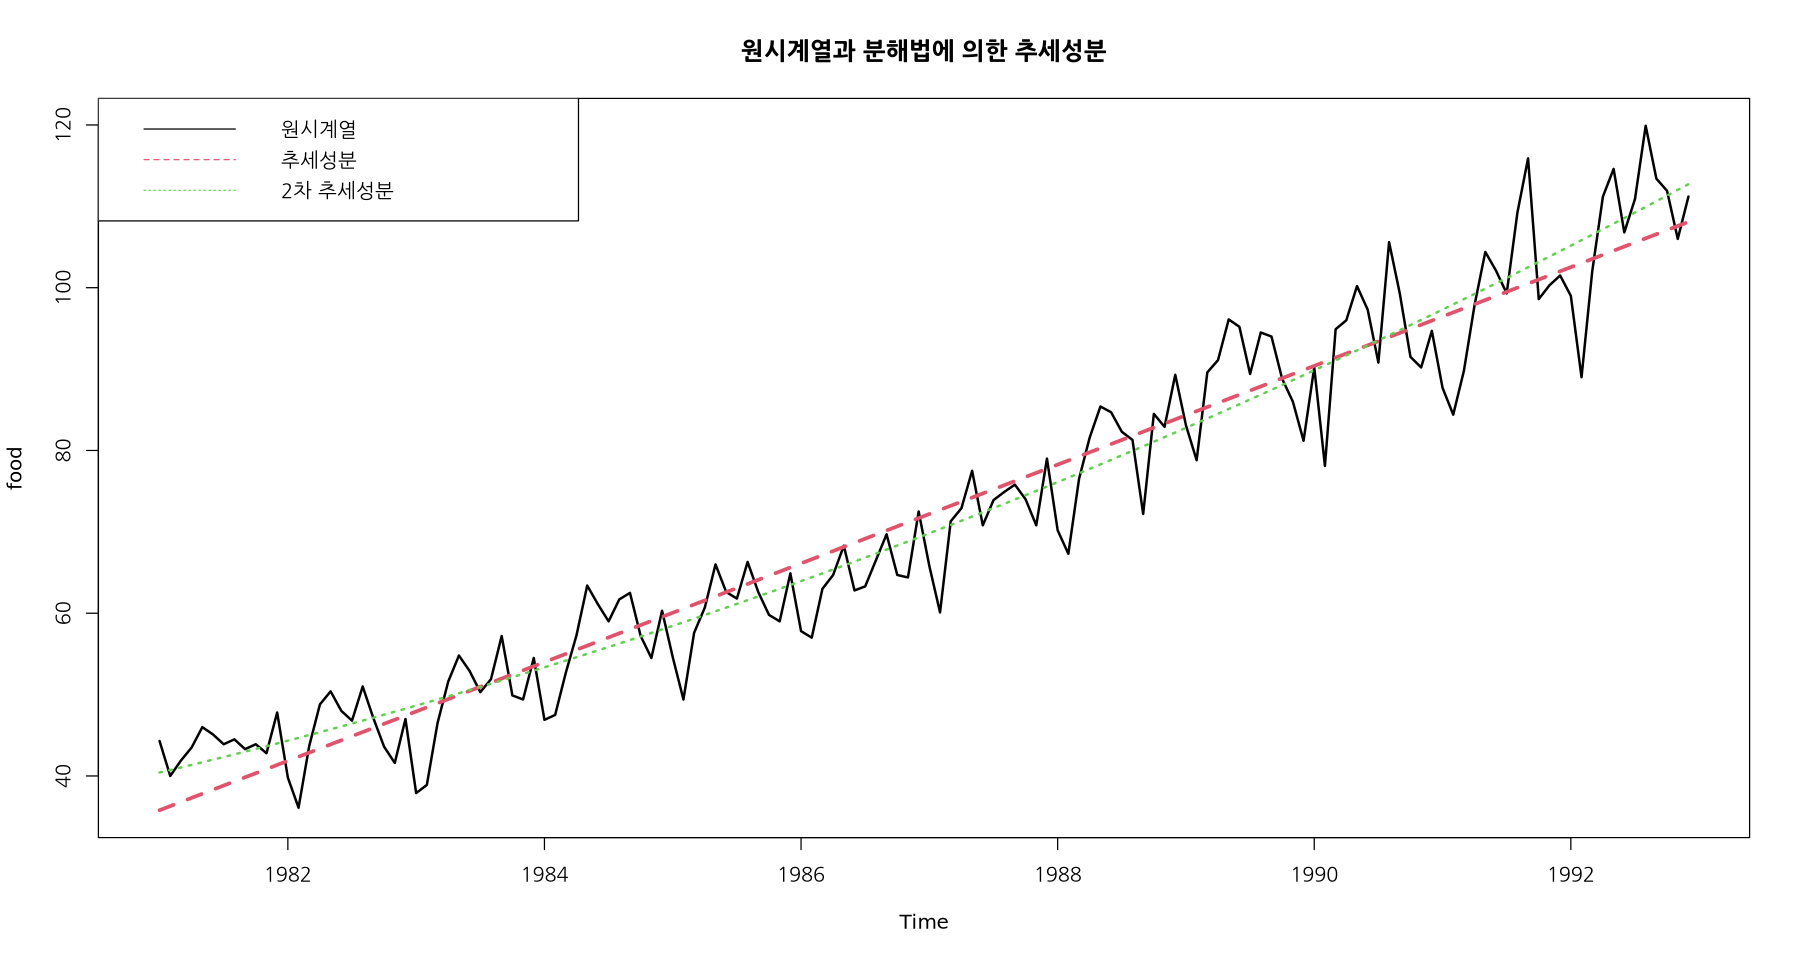

In [100]:
ts.plot(food, fitted(fit3), fitted(fit4), col=1:3, lty=1:3, lwd=2:3, ylab="food",
        main="원시계열과 분해법에 의한 추세성분")
legend("topleft", lty=1:3, col=1:3, c("원시계열", "추세성분", "2차 추세성분"))

`-` 2. 계절성분 추정 $Z_t/\hat T_t = \delta_1 I_1 + \cdots + \delta_{12}I_{12} + \epsilon_t$

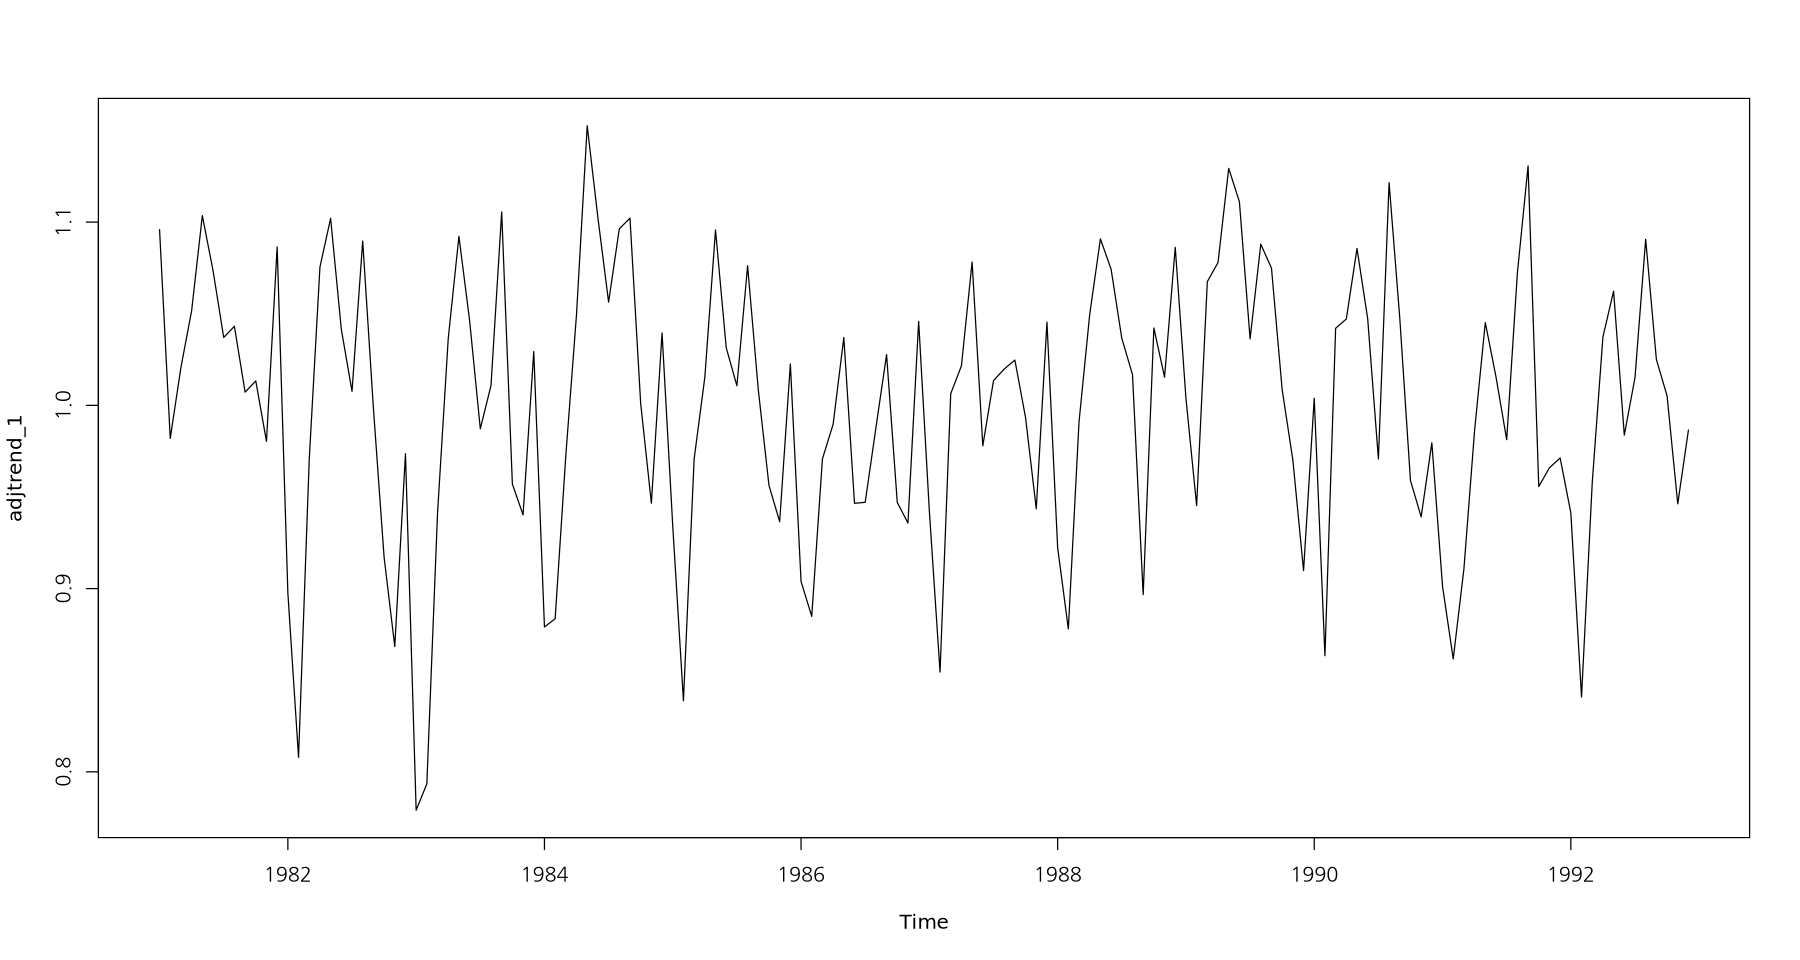

In [102]:
## 원시계열에서 추세성분 조정
trend_1 = fitted(fit4)
adjtrend_1 = food/trend_1
plot.ts(adjtrend_1)

> 상수값을 중심으로 대략적으로 나뉘어져 있어야 함. 대충 그러고 있는 것 같음.

In [103]:
y = factor(cycle(adjtrend_1))
fit5 = lm(adjtrend_1~0+y)
summary(fit5)


Call:
lm(formula = adjtrend_1 ~ 0 + y)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.154659 -0.027736  0.000622  0.028345  0.162186 

Coefficients:
    Estimate Std. Error t value Pr(>|t|)    
y1   0.93372    0.01368   68.23   <2e-16 ***
y2   0.86951    0.01368   63.54   <2e-16 ***
y3   0.98517    0.01368   72.00   <2e-16 ***
y4   1.03650    0.01368   75.75   <2e-16 ***
y5   1.08954    0.01368   79.62   <2e-16 ***
y6   1.03763    0.01368   75.83   <2e-16 ***
y7   1.00829    0.01368   73.69   <2e-16 ***
y8   1.05940    0.01368   77.42   <2e-16 ***
y9   1.03744    0.01368   75.82   <2e-16 ***
y10  0.97966    0.01368   71.59   <2e-16 ***
y11  0.94903    0.01368   69.35   <2e-16 ***
y12  1.01466    0.01368   74.15   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0474 on 132 degrees of freedom
Multiple R-squared:  0.998,	Adjusted R-squared:  0.9978 
F-statistic:  5359 on 12 and 132 DF,  p-value: < 2.2e-16


추정된 계절성분 : $\hat S_t = 0.934 I_1 + 0.870 I_2 + ⋯ + 1.015 I_{12}$

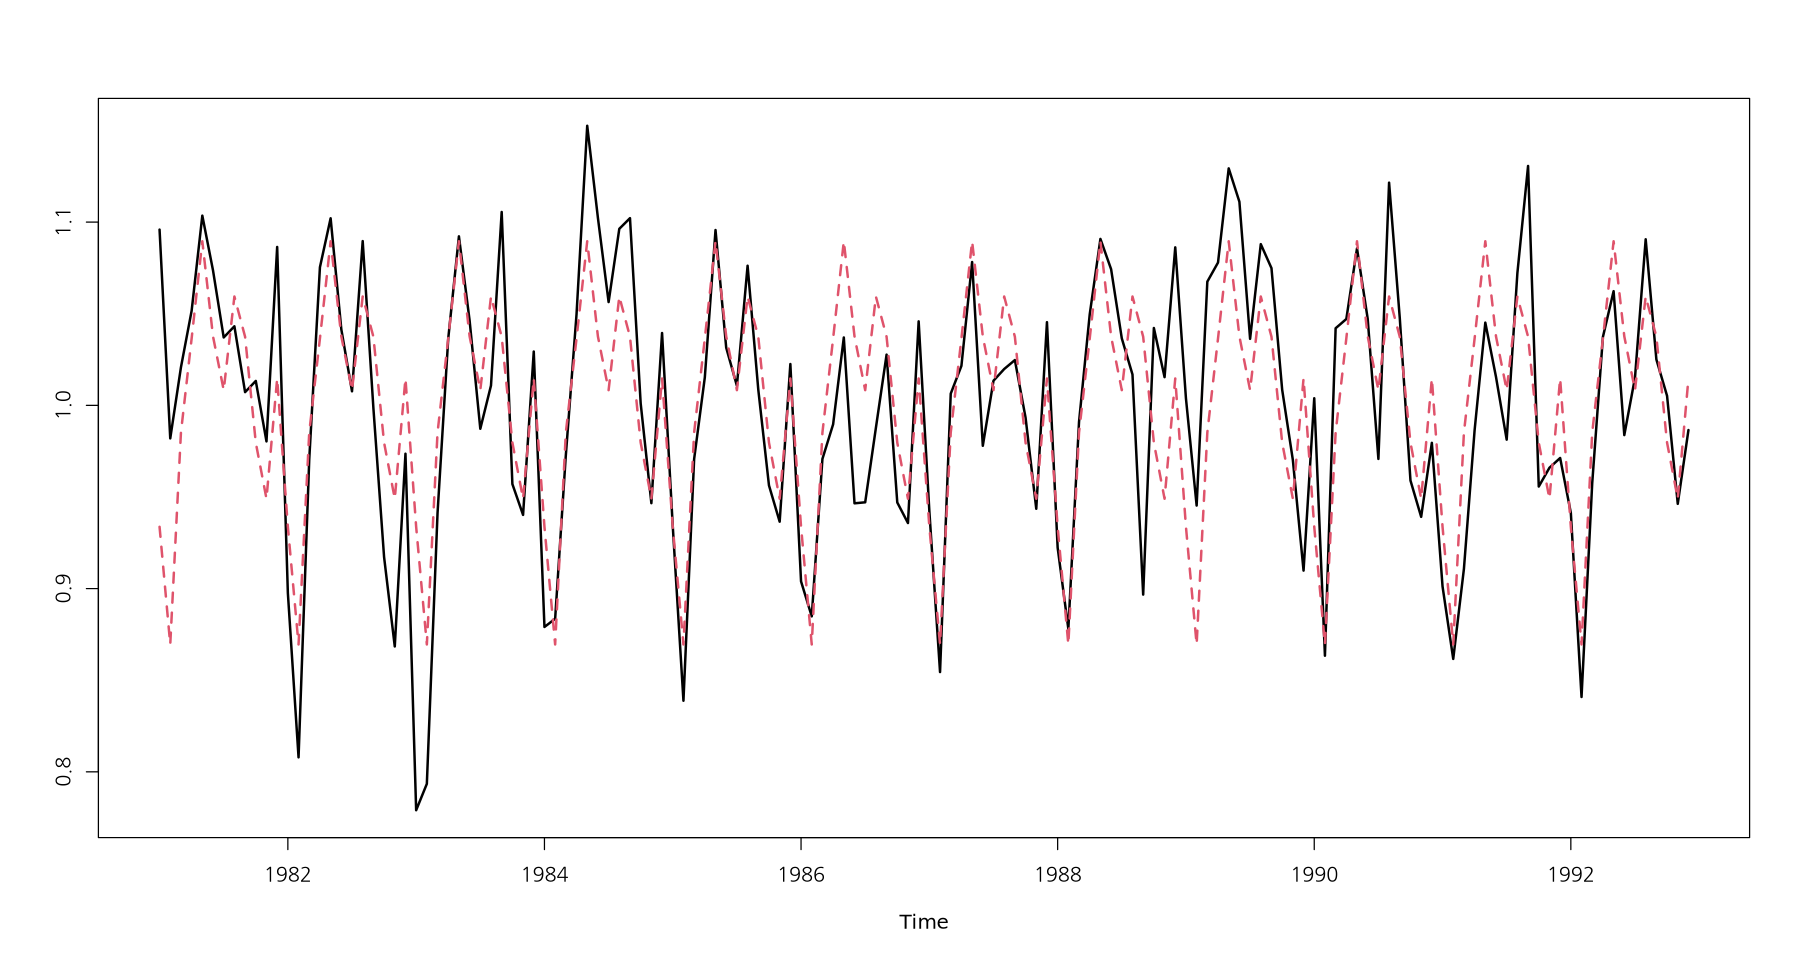

In [105]:
seasonal = fitted(fit5)
ts.plot(adjtrend_1, seasonal, col = 1:2, lty = 1:2, lwd = 2)

`-` 3. 불규칙 성분 : $\hat I_t = Z_t/(\hat T_t \times \hat S_t)$

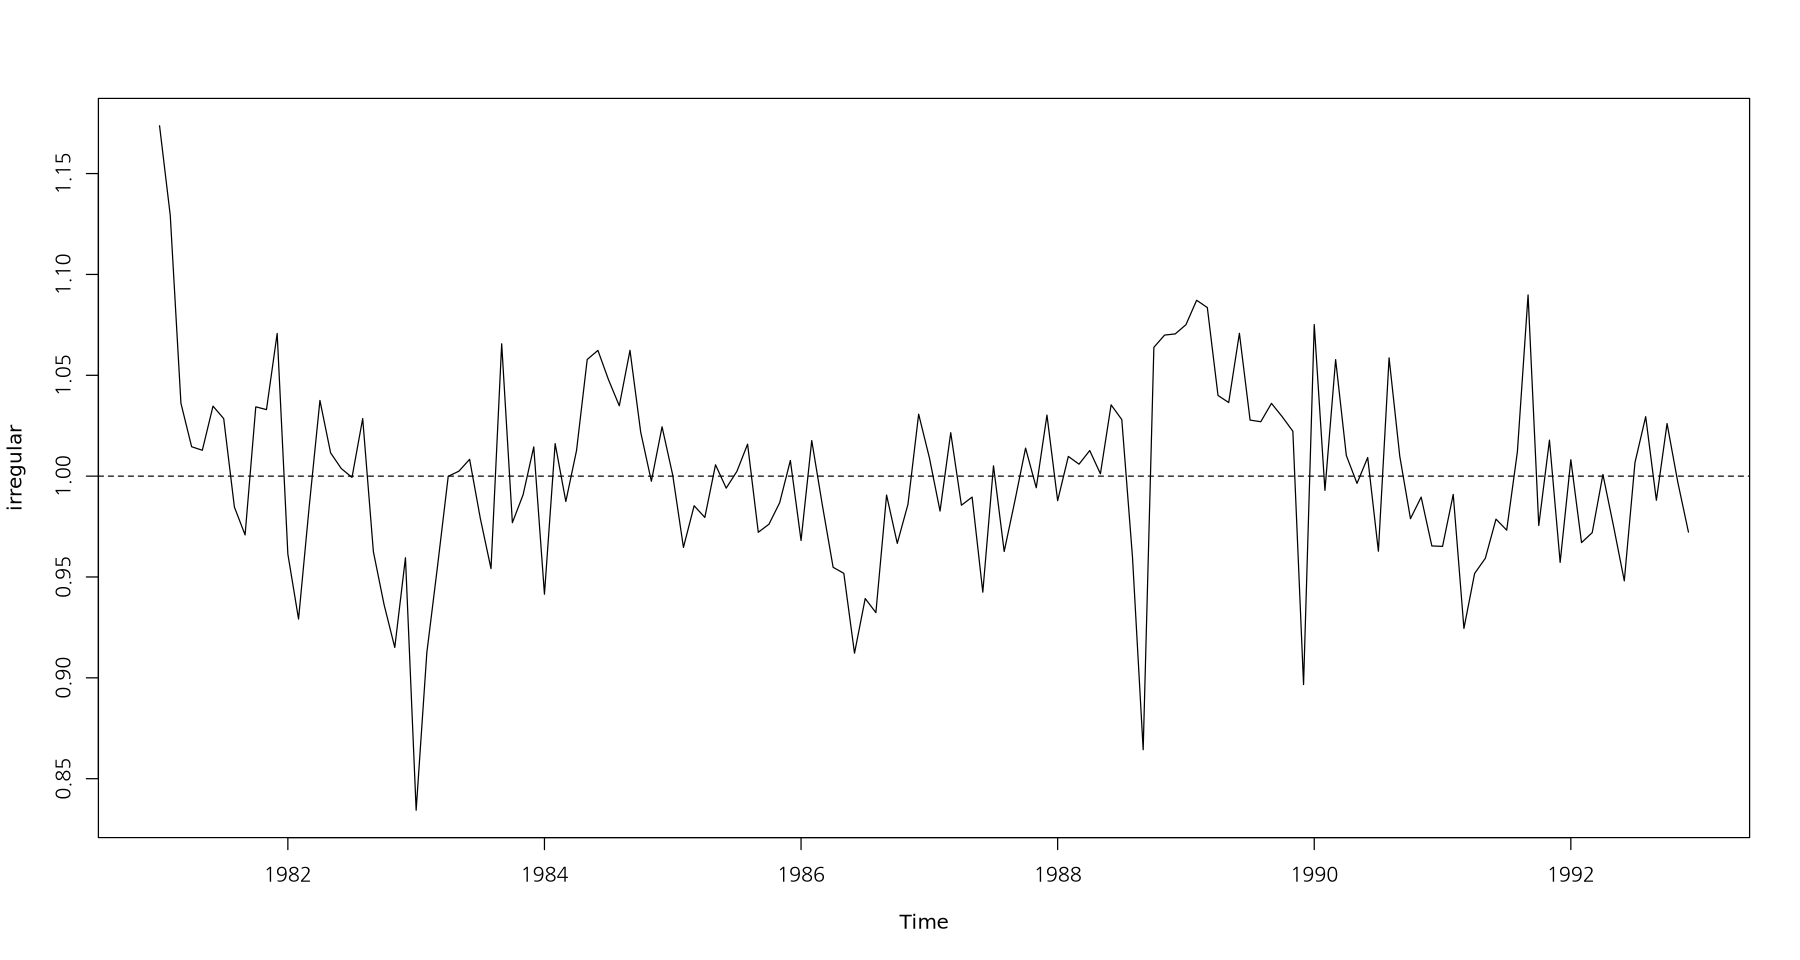

In [106]:
irregular = food/trend_1/seasonal

ts.plot(irregular); abline(h = 1, lty = 2)

> 승법모형이기 때문에 분자와 분모가 비슷하면 0이 아닌 1로 간다.

In [107]:
t.test(irregular, mu = 1)


	One Sample t-test

data:  irregular
t = 0, df = 143, p-value = 1
alternative hypothesis: true mean is not equal to 1
95 percent confidence interval:
 0.9923514 1.0076486
sample estimates:
mean of x 
        1 


In [108]:
dwtest(lm(irregular~1), alternative = "two.sided")


	Durbin-Watson test

data:  lm(irregular ~ 1)
DW = 1.0897, p-value = 3.799e-08
alternative hypothesis: true autocorrelation is not 0


`-` 4. 추정 : $\hat Z_t = \hat T_t × \hat S_t$

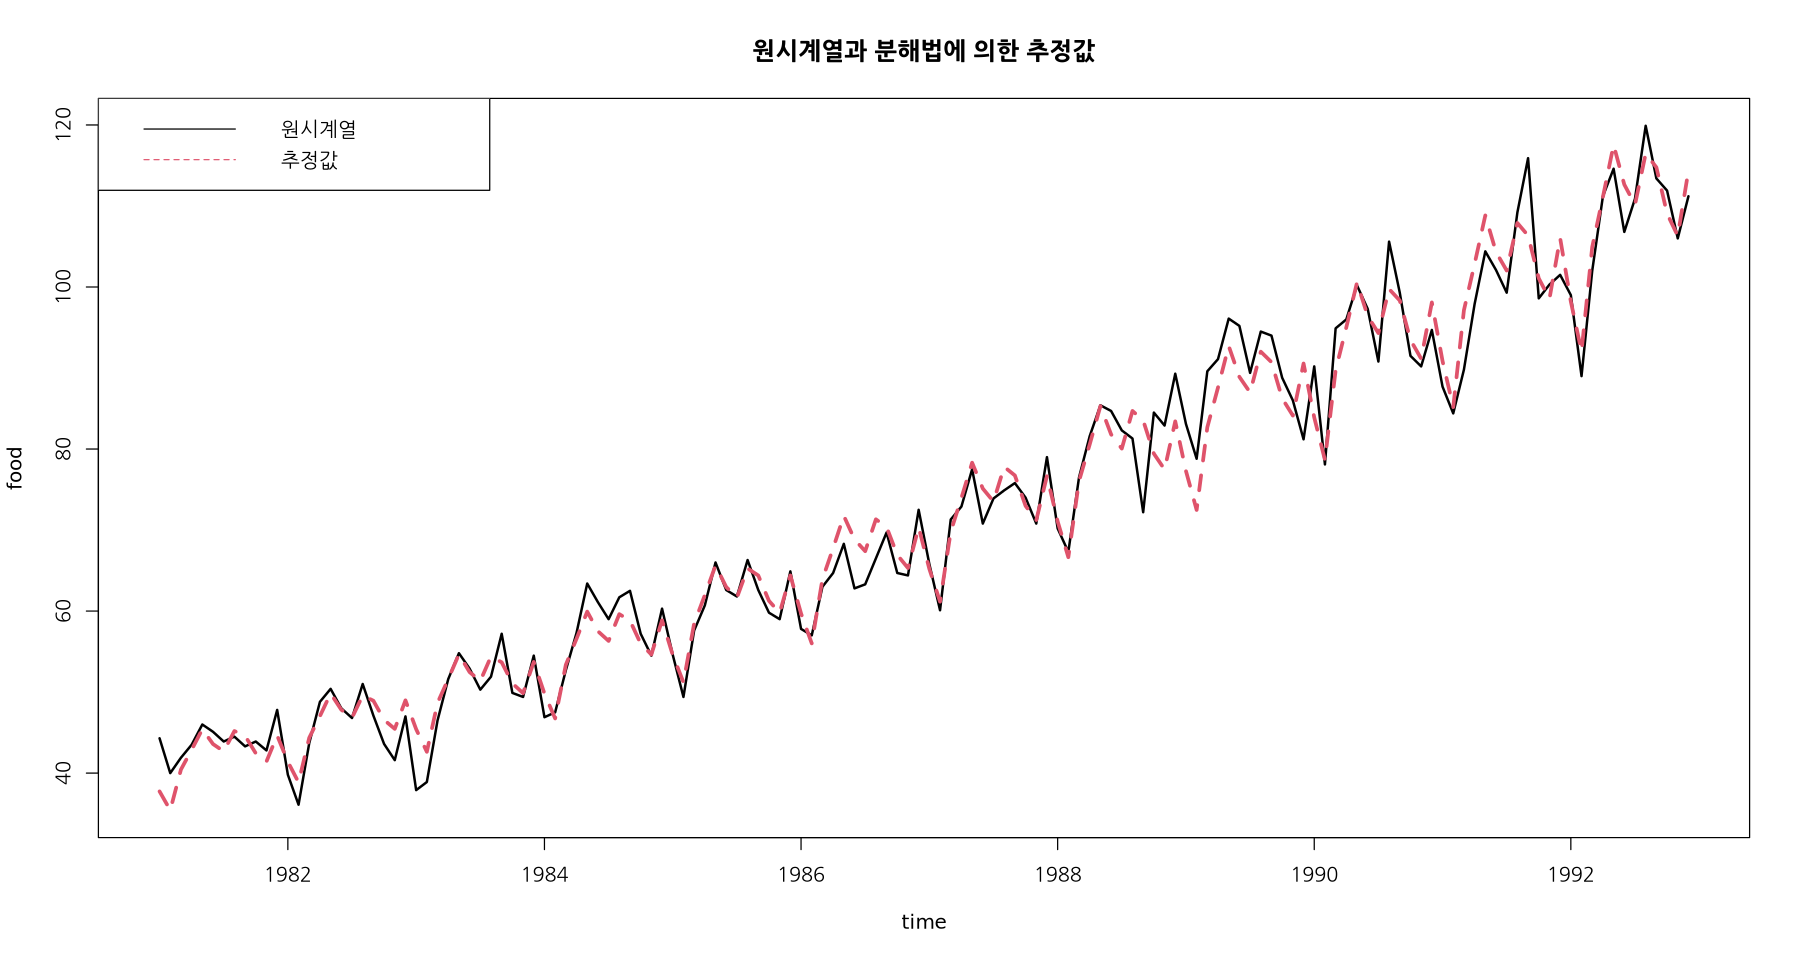

In [109]:
pred_m <- trend_1 * seasonal
ts.plot(food, pred_m, col=1:2, lty=1:2, lwd=2:3, ylab="food", xlab="time",
        main="원시계열과 분해법에 의한 추정값")
legend("topleft", lty=1:2, col=1:2, c("원시계열", "추정값"))

**비교**

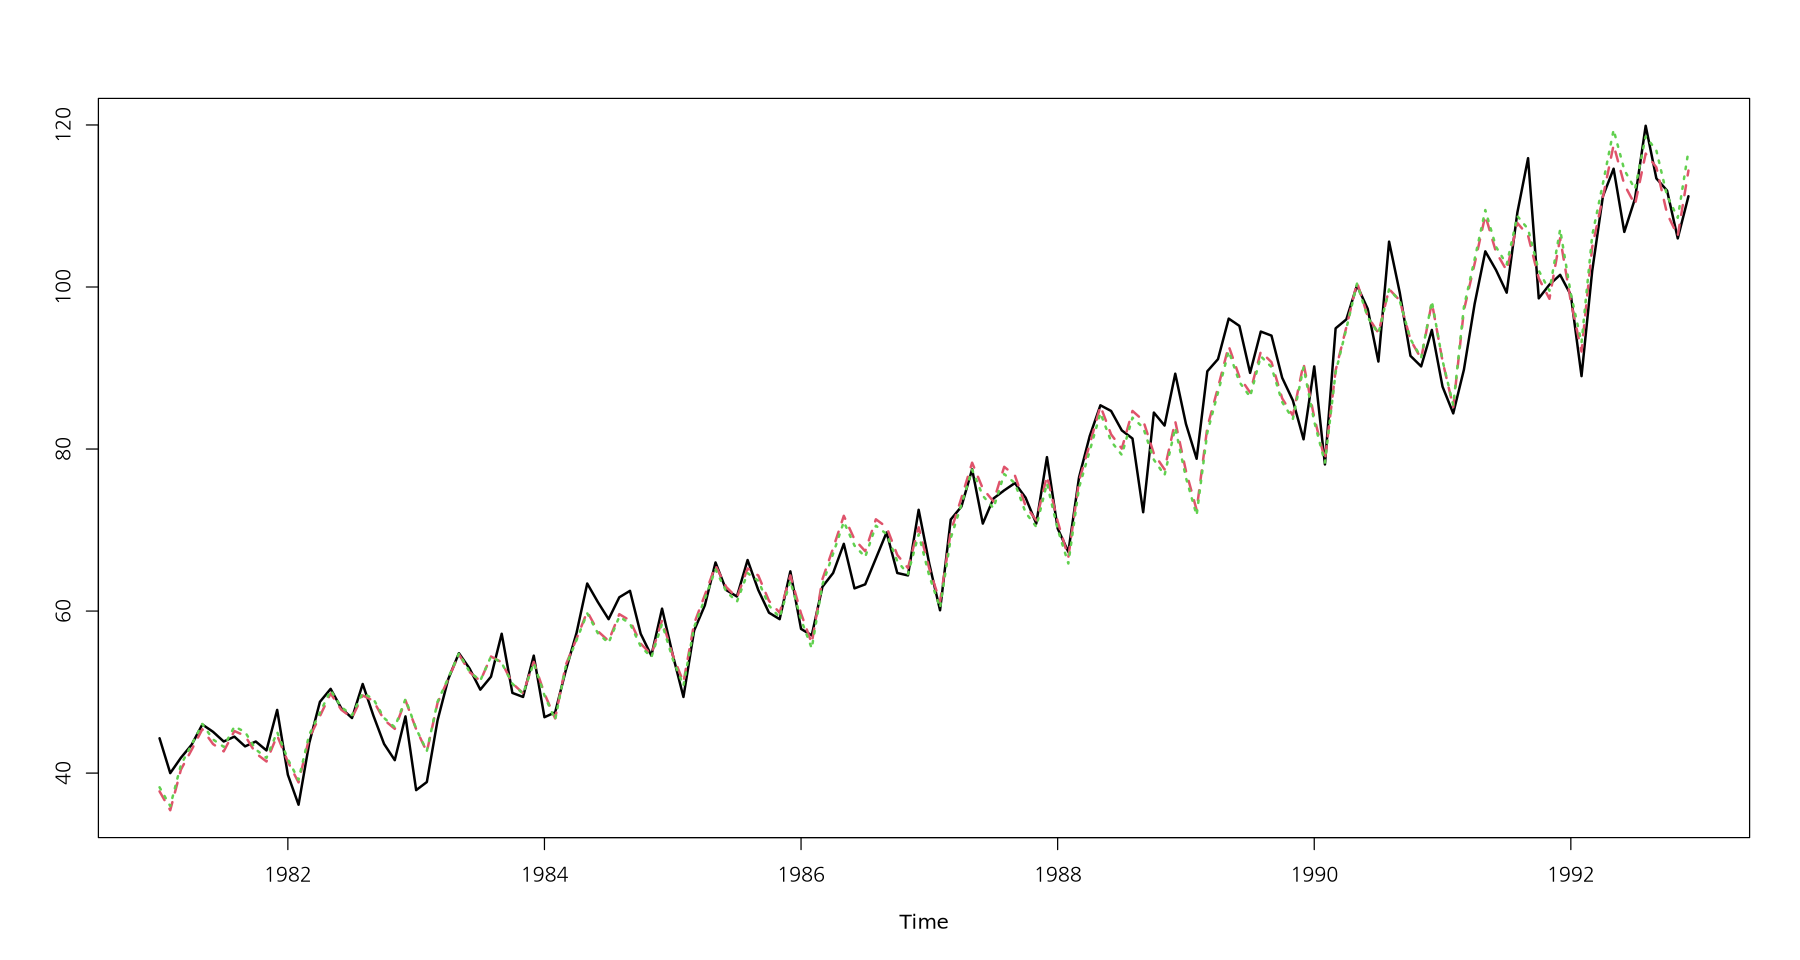

In [114]:
pred_a = exp(hat_Tt + hat_St)

ts.plot(food, pred_m, pred_a, col = 1:3, lty = 1:3, lwd = 2)

> 거의 비슷하게 추정되었음.

In [115]:
SSE_a = sum((food - pred_a)^2)
SSE_m = sum((food - pred_m)^2)

print(paste(SSE_a, SSE_m))

[1] "1636.87967934919 1483.03817025796"


> 둘 중 하나를 선택하자면 승법모형을 선택하는 것이 더 나을 것 같다. 끝